In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [6]:
sensors = sensors.reshape(16, 16, 1)

In [7]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [9]:
t = t.reshape((16, 1))

In [10]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [11]:
t_test

array([[0.4],
       [1.4]])

In [12]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [13]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [14]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=20000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/20000
1/1 [==============================] - 1s 1s/step - loss: 85.5345 - rmse: 9.2485
Epoch 2/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.5259 - rmse: 9.2480
Epoch 3/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.5163 - rmse: 9.2475
Epoch 4/20000
1/1 [==============================] - 0s 9ms/step - loss: 85.5067 - rmse: 9.2470
Epoch 5/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.4970 - rmse: 9.2465
Epoch 6/20000
1/1 [==============================] - 0s 8ms/step - loss: 85.4875 - rmse: 9.2459
Epoch 7/20000
1/1 [==============================] - 0s 10ms/step - loss: 85.4780 - rmse: 9.2454
Epoch 8/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.4685 - rmse: 9.2449
Epoch 9/20000
1/1 [==============================] - 0s 9ms/step - loss: 85.4590 - rmse: 9.2444
Epoch 10/20000
1/1 [==============================] - 0s 7ms/step - loss: 85.4496 - rmse: 9.2439
Epoch 11/20000
1/1 [===================

1/1 [==============================] - 0s 9ms/step - loss: 84.8697 - rmse: 9.2125
Epoch 86/20000
1/1 [==============================] - 0s 6ms/step - loss: 84.8628 - rmse: 9.2121
Epoch 87/20000
1/1 [==============================] - 0s 9ms/step - loss: 84.8559 - rmse: 9.2117
Epoch 88/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8489 - rmse: 9.2113
Epoch 89/20000
1/1 [==============================] - 0s 9ms/step - loss: 84.8420 - rmse: 9.2110
Epoch 90/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.8351 - rmse: 9.2106
Epoch 91/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8282 - rmse: 9.2102
Epoch 92/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.8213 - rmse: 9.2098
Epoch 93/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.8143 - rmse: 9.2095
Epoch 94/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.8074 - rmse: 9.2091
Epoch 95/20000
1/1 [=========================

1/1 [==============================] - 0s 8ms/step - loss: 84.3070 - rmse: 9.1819
Epoch 169/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.3003 - rmse: 9.1815
Epoch 170/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.2937 - rmse: 9.1812
Epoch 171/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.2871 - rmse: 9.1808
Epoch 172/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.2805 - rmse: 9.1804
Epoch 173/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.2739 - rmse: 9.1801
Epoch 174/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.2673 - rmse: 9.1797
Epoch 175/20000
1/1 [==============================] - 0s 8ms/step - loss: 84.2606 - rmse: 9.1794
Epoch 176/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.2540 - rmse: 9.1790
Epoch 177/20000
1/1 [==============================] - 0s 7ms/step - loss: 84.2474 - rmse: 9.1786
Epoch 178/20000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 83.7594 - rmse: 9.1520
Epoch 252/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.7528 - rmse: 9.1517
Epoch 253/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.7463 - rmse: 9.1513
Epoch 254/20000
1/1 [==============================] - 0s 8ms/step - loss: 83.7397 - rmse: 9.1509
Epoch 255/20000
1/1 [==============================] - 0s 8ms/step - loss: 83.7331 - rmse: 9.1506
Epoch 256/20000
1/1 [==============================] - 0s 8ms/step - loss: 83.7265 - rmse: 9.1502
Epoch 257/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.7199 - rmse: 9.1499
Epoch 258/20000
1/1 [==============================] - 0s 9ms/step - loss: 83.7133 - rmse: 9.1495
Epoch 259/20000
1/1 [==============================] - 0s 6ms/step - loss: 83.7067 - rmse: 9.1491
Epoch 260/20000
1/1 [==============================] - 0s 9ms/step - loss: 83.7002 - rmse: 9.1488
Epoch 261/20000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 83.1938 - rmse: 9.1211
Epoch 335/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.1870 - rmse: 9.1207
Epoch 336/20000
1/1 [==============================] - 0s 8ms/step - loss: 83.1802 - rmse: 9.1203
Epoch 337/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.1734 - rmse: 9.1199
Epoch 338/20000
1/1 [==============================] - 0s 10ms/step - loss: 83.1666 - rmse: 9.1196
Epoch 339/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.1598 - rmse: 9.1192
Epoch 340/20000
1/1 [==============================] - 0s 10ms/step - loss: 83.1530 - rmse: 9.1188
Epoch 341/20000
1/1 [==============================] - 0s 7ms/step - loss: 83.1462 - rmse: 9.1185
Epoch 342/20000
1/1 [==============================] - 0s 9ms/step - loss: 83.1394 - rmse: 9.1181
Epoch 343/20000
1/1 [==============================] - 0s 6ms/step - loss: 83.1327 - rmse: 9.1177
Epoch 344/20000
1/1 [=============

1/1 [==============================] - 0s 7ms/step - loss: 82.6349 - rmse: 9.0904
Epoch 418/20000
1/1 [==============================] - 0s 9ms/step - loss: 82.6282 - rmse: 9.0900
Epoch 419/20000
1/1 [==============================] - 0s 8ms/step - loss: 82.6215 - rmse: 9.0896
Epoch 420/20000
1/1 [==============================] - 0s 9ms/step - loss: 82.6148 - rmse: 9.0893
Epoch 421/20000
1/1 [==============================] - 0s 8ms/step - loss: 82.6081 - rmse: 9.0889
Epoch 422/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.6014 - rmse: 9.0885
Epoch 423/20000
1/1 [==============================] - 0s 6ms/step - loss: 82.5947 - rmse: 9.0882
Epoch 424/20000
1/1 [==============================] - 0s 8ms/step - loss: 82.5880 - rmse: 9.0878
Epoch 425/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.5812 - rmse: 9.0874
Epoch 426/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.5745 - rmse: 9.0871
Epoch 427/20000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 82.0729 - rmse: 9.0594
Epoch 501/20000
1/1 [==============================] - 0s 9ms/step - loss: 82.0660 - rmse: 9.0590
Epoch 502/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.0591 - rmse: 9.0586
Epoch 503/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.0521 - rmse: 9.0583
Epoch 504/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.0452 - rmse: 9.0579
Epoch 505/20000
1/1 [==============================] - 0s 7ms/step - loss: 82.0383 - rmse: 9.0575
Epoch 506/20000
1/1 [==============================] - 0s 10ms/step - loss: 82.0314 - rmse: 9.0571
Epoch 507/20000
1/1 [==============================] - 0s 8ms/step - loss: 82.0244 - rmse: 9.0567
Epoch 508/20000
1/1 [==============================] - 0s 9ms/step - loss: 82.0174 - rmse: 9.0563
Epoch 509/20000
1/1 [==============================] - 0s 6ms/step - loss: 82.0105 - rmse: 9.0560
Epoch 510/20000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 81.4888 - rmse: 9.0271
Epoch 584/20000
1/1 [==============================] - 0s 8ms/step - loss: 81.4817 - rmse: 9.0267
Epoch 585/20000
1/1 [==============================] - 0s 12ms/step - loss: 81.4745 - rmse: 9.0263
Epoch 586/20000
1/1 [==============================] - 0s 11ms/step - loss: 81.4673 - rmse: 9.0259
Epoch 587/20000
1/1 [==============================] - 0s 8ms/step - loss: 81.4601 - rmse: 9.0255
Epoch 588/20000
1/1 [==============================] - 0s 9ms/step - loss: 81.4529 - rmse: 9.0251
Epoch 589/20000
1/1 [==============================] - 0s 8ms/step - loss: 81.4457 - rmse: 9.0247
Epoch 590/20000
1/1 [==============================] - 0s 8ms/step - loss: 81.4385 - rmse: 9.0243
Epoch 591/20000
1/1 [==============================] - 0s 10ms/step - loss: 81.4313 - rmse: 9.0239
Epoch 592/20000
1/1 [==============================] - 0s 8ms/step - loss: 81.4240 - rmse: 9.0235
Epoch 593/20000
1/1 [============

1/1 [==============================] - 0s 9ms/step - loss: 80.8751 - rmse: 8.9931
Epoch 667/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8676 - rmse: 8.9926
Epoch 668/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8602 - rmse: 8.9922
Epoch 669/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8528 - rmse: 8.9918
Epoch 670/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.8453 - rmse: 8.9914
Epoch 671/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8378 - rmse: 8.9910
Epoch 672/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8304 - rmse: 8.9906
Epoch 673/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8229 - rmse: 8.9902
Epoch 674/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.8155 - rmse: 8.9897
Epoch 675/20000
1/1 [==============================] - 0s 10ms/step - loss: 80.8080 - rmse: 8.9893
Epoch 676/20000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 80.2509 - rmse: 8.9583
Epoch 750/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.2433 - rmse: 8.9579
Epoch 751/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.2357 - rmse: 8.9574
Epoch 752/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.2281 - rmse: 8.9570
Epoch 753/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.2205 - rmse: 8.9566
Epoch 754/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.2128 - rmse: 8.9562
Epoch 755/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.2052 - rmse: 8.9557
Epoch 756/20000
1/1 [==============================] - 0s 8ms/step - loss: 80.1976 - rmse: 8.9553
Epoch 757/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.1900 - rmse: 8.9549
Epoch 758/20000
1/1 [==============================] - 0s 9ms/step - loss: 80.1824 - rmse: 8.9545
Epoch 759/20000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 79.6125 - rmse: 8.9226
Epoch 833/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.6047 - rmse: 8.9221
Epoch 834/20000
1/1 [==============================] - 0s 9ms/step - loss: 79.5970 - rmse: 8.9217
Epoch 835/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.5892 - rmse: 8.9213
Epoch 836/20000
1/1 [==============================] - 0s 9ms/step - loss: 79.5814 - rmse: 8.9208
Epoch 837/20000
1/1 [==============================] - 0s 9ms/step - loss: 79.5736 - rmse: 8.9204
Epoch 838/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.5658 - rmse: 8.9200
Epoch 839/20000
1/1 [==============================] - 0s 10ms/step - loss: 79.5580 - rmse: 8.9195
Epoch 840/20000
1/1 [==============================] - 0s 9ms/step - loss: 79.5502 - rmse: 8.9191
Epoch 841/20000
1/1 [==============================] - 0s 9ms/step - loss: 79.5424 - rmse: 8.9187
Epoch 842/20000
1/1 [===========

1/1 [==============================] - 0s 9ms/step - loss: 78.9597 - rmse: 8.8859
Epoch 916/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.9518 - rmse: 8.8855
Epoch 917/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9438 - rmse: 8.8850
Epoch 918/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.9359 - rmse: 8.8846
Epoch 919/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.9279 - rmse: 8.8841
Epoch 920/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9199 - rmse: 8.8837
Epoch 921/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.9120 - rmse: 8.8832
Epoch 922/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.9040 - rmse: 8.8828
Epoch 923/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.8961 - rmse: 8.8823
Epoch 924/20000
1/1 [==============================] - 0s 8ms/step - loss: 78.8881 - rmse: 8.8819
Epoch 925/20000
1/1 [============

1/1 [==============================] - 0s 9ms/step - loss: 78.2930 - rmse: 8.8483
Epoch 999/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2849 - rmse: 8.8479
Epoch 1000/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2767 - rmse: 8.8474
Epoch 1001/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2686 - rmse: 8.8470
Epoch 1002/20000
1/1 [==============================] - 0s 10ms/step - loss: 78.2605 - rmse: 8.8465
Epoch 1003/20000
1/1 [==============================] - 0s 8ms/step - loss: 78.2524 - rmse: 8.8460
Epoch 1004/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2443 - rmse: 8.8456
Epoch 1005/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2361 - rmse: 8.8451
Epoch 1006/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2280 - rmse: 8.8447
Epoch 1007/20000
1/1 [==============================] - 0s 9ms/step - loss: 78.2199 - rmse: 8.8442
Epoch 1008/20000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 77.6193 - rmse: 8.8102
Epoch 1081/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.6109 - rmse: 8.8097
Epoch 1082/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.6026 - rmse: 8.8092
Epoch 1083/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5943 - rmse: 8.8088
Epoch 1084/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5859 - rmse: 8.8083
Epoch 1085/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5776 - rmse: 8.8078
Epoch 1086/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5693 - rmse: 8.8073
Epoch 1087/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5609 - rmse: 8.8069
Epoch 1088/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5526 - rmse: 8.8064
Epoch 1089/20000
1/1 [==============================] - 0s 9ms/step - loss: 77.5443 - rmse: 8.8059
Epoch 1090/20000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 76.9305 - rmse: 8.7710
Epoch 1163/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.9219 - rmse: 8.7705
Epoch 1164/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.9133 - rmse: 8.7700
Epoch 1165/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.9048 - rmse: 8.7695
Epoch 1166/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.8962 - rmse: 8.7690
Epoch 1167/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.8876 - rmse: 8.7686
Epoch 1168/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.8790 - rmse: 8.7681
Epoch 1169/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.8705 - rmse: 8.7676
Epoch 1170/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.8619 - rmse: 8.7671
Epoch 1171/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.8533 - rmse: 8.7666
Epoch 1172/20000
1/1 [===

1/1 [==============================] - 0s 10ms/step - loss: 76.2259 - rmse: 8.7307
Epoch 1245/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.2173 - rmse: 8.7302
Epoch 1246/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.2086 - rmse: 8.7298
Epoch 1247/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.2000 - rmse: 8.7293
Epoch 1248/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.1914 - rmse: 8.7288
Epoch 1249/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.1827 - rmse: 8.7283
Epoch 1250/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.1741 - rmse: 8.7278
Epoch 1251/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.1654 - rmse: 8.7273
Epoch 1252/20000
1/1 [==============================] - 0s 9ms/step - loss: 76.1568 - rmse: 8.7268
Epoch 1253/20000
1/1 [==============================] - 0s 10ms/step - loss: 76.1481 - rmse: 8.7263
Epoch 1254/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 75.5137 - rmse: 8.6899
Epoch 1327/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.5050 - rmse: 8.6894
Epoch 1328/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4962 - rmse: 8.6889
Epoch 1329/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4875 - rmse: 8.6884
Epoch 1330/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4787 - rmse: 8.6878
Epoch 1331/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.4700 - rmse: 8.6873
Epoch 1332/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4612 - rmse: 8.6868
Epoch 1333/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4525 - rmse: 8.6863
Epoch 1334/20000
1/1 [==============================] - 0s 9ms/step - loss: 75.4437 - rmse: 8.6858
Epoch 1335/20000
1/1 [==============================] - 0s 10ms/step - loss: 75.4350 - rmse: 8.6853
Epoch 1336/20000
1/1 [==

1/1 [==============================] - 0s 10ms/step - loss: 74.7927 - rmse: 8.6483
Epoch 1409/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7838 - rmse: 8.6478
Epoch 1410/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7750 - rmse: 8.6473
Epoch 1411/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.7661 - rmse: 8.6467
Epoch 1412/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7573 - rmse: 8.6462
Epoch 1413/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7484 - rmse: 8.6457
Epoch 1414/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7396 - rmse: 8.6452
Epoch 1415/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7307 - rmse: 8.6447
Epoch 1416/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7218 - rmse: 8.6442
Epoch 1417/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.7130 - rmse: 8.6437
Epoch 1418/20000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 74.0613 - rmse: 8.6059
Epoch 1491/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.0523 - rmse: 8.6054
Epoch 1492/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.0432 - rmse: 8.6048
Epoch 1493/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0342 - rmse: 8.6043
Epoch 1494/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0252 - rmse: 8.6038
Epoch 1495/20000
1/1 [==============================] - 0s 10ms/step - loss: 74.0161 - rmse: 8.6033
Epoch 1496/20000
1/1 [==============================] - 0s 9ms/step - loss: 74.0071 - rmse: 8.6027
Epoch 1497/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.9981 - rmse: 8.6022
Epoch 1498/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.9890 - rmse: 8.6017
Epoch 1499/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.9800 - rmse: 8.6012
Epoch 1500/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 73.3184 - rmse: 8.5626
Epoch 1573/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.3093 - rmse: 8.5621
Epoch 1574/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.3002 - rmse: 8.5616
Epoch 1575/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2911 - rmse: 8.5610
Epoch 1576/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2821 - rmse: 8.5605
Epoch 1577/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2730 - rmse: 8.5600
Epoch 1578/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2639 - rmse: 8.5594
Epoch 1579/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2548 - rmse: 8.5589
Epoch 1580/20000
1/1 [==============================] - 0s 9ms/step - loss: 73.2457 - rmse: 8.5584
Epoch 1581/20000
1/1 [==============================] - 0s 10ms/step - loss: 73.2366 - rmse: 8.5578
Epoch 1582/20000
1/1 [===

1/1 [==============================] - 0s 10ms/step - loss: 72.5575 - rmse: 8.5181
Epoch 1655/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5481 - rmse: 8.5175
Epoch 1656/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5387 - rmse: 8.5170
Epoch 1657/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5293 - rmse: 8.5164
Epoch 1658/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5199 - rmse: 8.5159
Epoch 1659/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5105 - rmse: 8.5153
Epoch 1660/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.5011 - rmse: 8.5148
Epoch 1661/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.4918 - rmse: 8.5142
Epoch 1662/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.4824 - rmse: 8.5137
Epoch 1663/20000
1/1 [==============================] - 0s 9ms/step - loss: 72.4730 - rmse: 8.5131
Epoch 1664/20000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 71.7918 - rmse: 8.4730
Epoch 1737/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7825 - rmse: 8.4725
Epoch 1738/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.7731 - rmse: 8.4719
Epoch 1739/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7638 - rmse: 8.4714
Epoch 1740/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7545 - rmse: 8.4708
Epoch 1741/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7451 - rmse: 8.4702
Epoch 1742/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7358 - rmse: 8.4697
Epoch 1743/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7264 - rmse: 8.4691
Epoch 1744/20000
1/1 [==============================] - 0s 10ms/step - loss: 71.7171 - rmse: 8.4686
Epoch 1745/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.7078 - rmse: 8.4680
Epoch 1746/20000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 71.0247 - rmse: 8.4276
Epoch 1819/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.0153 - rmse: 8.4271
Epoch 1820/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.0059 - rmse: 8.4265
Epoch 1821/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9965 - rmse: 8.4259
Epoch 1822/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9872 - rmse: 8.4254
Epoch 1823/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.9778 - rmse: 8.4248
Epoch 1824/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9684 - rmse: 8.4243
Epoch 1825/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9590 - rmse: 8.4237
Epoch 1826/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9496 - rmse: 8.4232
Epoch 1827/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.9402 - rmse: 8.4226
Epoch 1828/20000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 70.2385 - rmse: 8.3808
Epoch 1901/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.2289 - rmse: 8.3803
Epoch 1902/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.2194 - rmse: 8.3797
Epoch 1903/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.2098 - rmse: 8.3791
Epoch 1904/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.2002 - rmse: 8.3786
Epoch 1905/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.1906 - rmse: 8.3780
Epoch 1906/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.1810 - rmse: 8.3774
Epoch 1907/20000
1/1 [==============================] - 0s 10ms/step - loss: 70.1715 - rmse: 8.3768
Epoch 1908/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.1619 - rmse: 8.3763
Epoch 1909/20000
1/1 [==============================] - 0s 9ms/step - loss: 70.1523 - rmse: 8.3757
Epoch 1910/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 69.4510 - rmse: 8.3337
Epoch 1983/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.4413 - rmse: 8.3331
Epoch 1984/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.4316 - rmse: 8.3326
Epoch 1985/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.4219 - rmse: 8.3320
Epoch 1986/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.4122 - rmse: 8.3314
Epoch 1987/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.4025 - rmse: 8.3308
Epoch 1988/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.3928 - rmse: 8.3302
Epoch 1989/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.3831 - rmse: 8.3297
Epoch 1990/20000
1/1 [==============================] - 0s 9ms/step - loss: 69.3734 - rmse: 8.3291
Epoch 1991/20000
1/1 [==============================] - 0s 10ms/step - loss: 69.3637 - rmse: 8.3285
Epoch 1992/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 68.6535 - rmse: 8.2857
Epoch 2065/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.6439 - rmse: 8.2852
Epoch 2066/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.6342 - rmse: 8.2846
Epoch 2067/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.6245 - rmse: 8.2840
Epoch 2068/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.6149 - rmse: 8.2834
Epoch 2069/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.6052 - rmse: 8.2828
Epoch 2070/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.5955 - rmse: 8.2822
Epoch 2071/20000
1/1 [==============================] - 0s 10ms/step - loss: 68.5859 - rmse: 8.2817
Epoch 2072/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.5761 - rmse: 8.2811
Epoch 2073/20000
1/1 [==============================] - 0s 9ms/step - loss: 68.5664 - rmse: 8.2805
Epoch 2074/20000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 67.8532 - rmse: 8.2373
Epoch 2147/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.8435 - rmse: 8.2367
Epoch 2148/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.8338 - rmse: 8.2361
Epoch 2149/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.8241 - rmse: 8.2355
Epoch 2150/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.8143 - rmse: 8.2349
Epoch 2151/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.8046 - rmse: 8.2344
Epoch 2152/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.7949 - rmse: 8.2338
Epoch 2153/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.7852 - rmse: 8.2332
Epoch 2154/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.7754 - rmse: 8.2326
Epoch 2155/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.7657 - rmse: 8.2320
Epoch 2156/20000
1/1 [===

1/1 [==============================] - 0s 10ms/step - loss: 67.0561 - rmse: 8.1888
Epoch 2229/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.0464 - rmse: 8.1882
Epoch 2230/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.0367 - rmse: 8.1876
Epoch 2231/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.0270 - rmse: 8.1870
Epoch 2232/20000
1/1 [==============================] - 0s 10ms/step - loss: 67.0173 - rmse: 8.1864
Epoch 2233/20000
1/1 [==============================] - 0s 9ms/step - loss: 67.0076 - rmse: 8.1858
Epoch 2234/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9979 - rmse: 8.1852
Epoch 2235/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.9882 - rmse: 8.1846
Epoch 2236/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.9785 - rmse: 8.1840
Epoch 2237/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.9688 - rmse: 8.1834
Epoch 2238/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 66.2527 - rmse: 8.1396
Epoch 2311/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.2426 - rmse: 8.1390
Epoch 2312/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.2324 - rmse: 8.1383
Epoch 2313/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.2222 - rmse: 8.1377
Epoch 2314/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.2119 - rmse: 8.1371
Epoch 2315/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.2016 - rmse: 8.1364
Epoch 2316/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1913 - rmse: 8.1358
Epoch 2317/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.1810 - rmse: 8.1352
Epoch 2318/20000
1/1 [==============================] - 0s 10ms/step - loss: 66.1707 - rmse: 8.1345
Epoch 2319/20000
1/1 [==============================] - 0s 9ms/step - loss: 66.1604 - rmse: 8.1339
Epoch 2320/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 65.4372 - rmse: 8.0893
Epoch 2393/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.4274 - rmse: 8.0887
Epoch 2394/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.4176 - rmse: 8.0881
Epoch 2395/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.4078 - rmse: 8.0875
Epoch 2396/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3980 - rmse: 8.0869
Epoch 2397/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3882 - rmse: 8.0863
Epoch 2398/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3784 - rmse: 8.0857
Epoch 2399/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3686 - rmse: 8.0851
Epoch 2400/20000
1/1 [==============================] - 0s 9ms/step - loss: 65.3588 - rmse: 8.0845
Epoch 2401/20000
1/1 [==============================] - 0s 10ms/step - loss: 65.3490 - rmse: 8.0839
Epoch 2402/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 64.6332 - rmse: 8.0395
Epoch 2475/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.6232 - rmse: 8.0389
Epoch 2476/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.6133 - rmse: 8.0382
Epoch 2477/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.6034 - rmse: 8.0376
Epoch 2478/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5934 - rmse: 8.0370
Epoch 2479/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5835 - rmse: 8.0364
Epoch 2480/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5736 - rmse: 8.0358
Epoch 2481/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5637 - rmse: 8.0352
Epoch 2482/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5538 - rmse: 8.0345
Epoch 2483/20000
1/1 [==============================] - 0s 9ms/step - loss: 64.5438 - rmse: 8.0339
Epoch 2484/20000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 63.8235 - rmse: 7.9890
Epoch 2557/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.8136 - rmse: 7.9883
Epoch 2558/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.8038 - rmse: 7.9877
Epoch 2559/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7940 - rmse: 7.9871
Epoch 2560/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.7842 - rmse: 7.9865
Epoch 2561/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.7744 - rmse: 7.9859
Epoch 2562/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.7645 - rmse: 7.9853
Epoch 2563/20000
1/1 [==============================] - 0s 8ms/step - loss: 63.7547 - rmse: 7.9847
Epoch 2564/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.7449 - rmse: 7.9840
Epoch 2565/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.7351 - rmse: 7.9834
Epoch 2566/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 63.0203 - rmse: 7.9385
Epoch 2639/20000
1/1 [==============================] - 0s 10ms/step - loss: 63.0105 - rmse: 7.9379
Epoch 2640/20000
1/1 [==============================] - 0s 9ms/step - loss: 63.0008 - rmse: 7.9373
Epoch 2641/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9910 - rmse: 7.9367
Epoch 2642/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9812 - rmse: 7.9361
Epoch 2643/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9714 - rmse: 7.9355
Epoch 2644/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9617 - rmse: 7.9348
Epoch 2645/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9519 - rmse: 7.9342
Epoch 2646/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.9422 - rmse: 7.9336
Epoch 2647/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.9324 - rmse: 7.9330
Epoch 2648/20000
1/1 [==

1/1 [==============================] - 0s 9ms/step - loss: 62.2206 - rmse: 7.8880
Epoch 2721/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.2109 - rmse: 7.8874
Epoch 2722/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.2011 - rmse: 7.8868
Epoch 2723/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1914 - rmse: 7.8862
Epoch 2724/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.1817 - rmse: 7.8855
Epoch 2725/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1719 - rmse: 7.8849
Epoch 2726/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.1622 - rmse: 7.8843
Epoch 2727/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.1525 - rmse: 7.8837
Epoch 2728/20000
1/1 [==============================] - 0s 10ms/step - loss: 62.1428 - rmse: 7.8831
Epoch 2729/20000
1/1 [==============================] - 0s 9ms/step - loss: 62.1330 - rmse: 7.8825
Epoch 2730/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 61.4237 - rmse: 7.8373
Epoch 2803/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.4140 - rmse: 7.8367
Epoch 2804/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.4043 - rmse: 7.8361
Epoch 2805/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3946 - rmse: 7.8355
Epoch 2806/20000
1/1 [==============================] - 0s 10ms/step - loss: 61.3849 - rmse: 7.8349
Epoch 2807/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3752 - rmse: 7.8342
Epoch 2808/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3655 - rmse: 7.8336
Epoch 2809/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3558 - rmse: 7.8330
Epoch 2810/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3461 - rmse: 7.8324
Epoch 2811/20000
1/1 [==============================] - 0s 9ms/step - loss: 61.3364 - rmse: 7.8318
Epoch 2812/20000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 60.6290 - rmse: 7.7865
Epoch 2885/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.6194 - rmse: 7.7858
Epoch 2886/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.6097 - rmse: 7.7852
Epoch 2887/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.6000 - rmse: 7.7846
Epoch 2888/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.5903 - rmse: 7.7840
Epoch 2889/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.5806 - rmse: 7.7834
Epoch 2890/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.5709 - rmse: 7.7827
Epoch 2891/20000
1/1 [==============================] - 0s 10ms/step - loss: 60.5613 - rmse: 7.7821
Epoch 2892/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.5516 - rmse: 7.7815
Epoch 2893/20000
1/1 [==============================] - 0s 9ms/step - loss: 60.5419 - rmse: 7.7809
Epoch 2894/20000
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 59.8300 - rmse: 7.7350
Epoch 2967/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.8201 - rmse: 7.7343
Epoch 2968/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.8102 - rmse: 7.7337
Epoch 2969/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.8003 - rmse: 7.7331
Epoch 2970/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.7904 - rmse: 7.7324
Epoch 2971/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.7806 - rmse: 7.7318
Epoch 2972/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.7707 - rmse: 7.7312
Epoch 2973/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.7608 - rmse: 7.7305
Epoch 2974/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.7510 - rmse: 7.7299
Epoch 2975/20000
1/1 [==============================] - 0s 7ms/step - loss: 59.7411 - rmse: 7.7292
Epoch 2976/20000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 59.0301 - rmse: 7.6831
Epoch 3049/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.0204 - rmse: 7.6825
Epoch 3050/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.0107 - rmse: 7.6818
Epoch 3051/20000
1/1 [==============================] - 0s 6ms/step - loss: 59.0011 - rmse: 7.6812
Epoch 3052/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.9914 - rmse: 7.6806
Epoch 3053/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.9817 - rmse: 7.6800
Epoch 3054/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.9720 - rmse: 7.6793
Epoch 3055/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.9624 - rmse: 7.6787
Epoch 3056/20000
1/1 [==============================] - 0s 6ms/step - loss: 58.9527 - rmse: 7.6781
Epoch 3057/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.9430 - rmse: 7.6774
Epoch 3058/20000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 58.2401 - rmse: 7.6315
Epoch 3131/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.2305 - rmse: 7.6309
Epoch 3132/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.2209 - rmse: 7.6303
Epoch 3133/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.2113 - rmse: 7.6296
Epoch 3134/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.2017 - rmse: 7.6290
Epoch 3135/20000
1/1 [==============================] - 0s 8ms/step - loss: 58.1921 - rmse: 7.6284
Epoch 3136/20000
1/1 [==============================] - 0s 8ms/step - loss: 58.1825 - rmse: 7.6277
Epoch 3137/20000
1/1 [==============================] - 0s 9ms/step - loss: 58.1729 - rmse: 7.6271
Epoch 3138/20000
1/1 [==============================] - 0s 7ms/step - loss: 58.1633 - rmse: 7.6265
Epoch 3139/20000
1/1 [==============================] - 0s 9ms/step - loss: 58.1537 - rmse: 7.6259
Epoch 3140/20000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 57.4550 - rmse: 7.5799
Epoch 3213/20000
1/1 [==============================] - 0s 7ms/step - loss: 57.4455 - rmse: 7.5793
Epoch 3214/20000
1/1 [==============================] - 0s 8ms/step - loss: 57.4359 - rmse: 7.5786
Epoch 3215/20000
1/1 [==============================] - 0s 6ms/step - loss: 57.4264 - rmse: 7.5780
Epoch 3216/20000
1/1 [==============================] - 0s 8ms/step - loss: 57.4168 - rmse: 7.5774
Epoch 3217/20000
1/1 [==============================] - 0s 7ms/step - loss: 57.4073 - rmse: 7.5768
Epoch 3218/20000
1/1 [==============================] - 0s 7ms/step - loss: 57.3977 - rmse: 7.5761
Epoch 3219/20000
1/1 [==============================] - 0s 6ms/step - loss: 57.3882 - rmse: 7.5755
Epoch 3220/20000
1/1 [==============================] - 0s 7ms/step - loss: 57.3786 - rmse: 7.5749
Epoch 3221/20000
1/1 [==============================] - 0s 6ms/step - loss: 57.3691 - rmse: 7.5742
Epoch 3222/20000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 56.6741 - rmse: 7.5282
Epoch 3295/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6646 - rmse: 7.5276
Epoch 3296/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6551 - rmse: 7.5270
Epoch 3297/20000
1/1 [==============================] - 0s 6ms/step - loss: 56.6456 - rmse: 7.5263
Epoch 3298/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6361 - rmse: 7.5257
Epoch 3299/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6266 - rmse: 7.5251
Epoch 3300/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6171 - rmse: 7.5244
Epoch 3301/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.6076 - rmse: 7.5238
Epoch 3302/20000
1/1 [==============================] - 0s 7ms/step - loss: 56.5981 - rmse: 7.5232
Epoch 3303/20000
1/1 [==============================] - 0s 10ms/step - loss: 56.5886 - rmse: 7.5225
Epoch 3304/20000
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 55.8942 - rmse: 7.4762
Epoch 3377/20000
1/1 [==============================] - 0s 6ms/step - loss: 55.8846 - rmse: 7.4756
Epoch 3378/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.8750 - rmse: 7.4750
Epoch 3379/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.8655 - rmse: 7.4743
Epoch 3380/20000
1/1 [==============================] - 0s 9ms/step - loss: 55.8559 - rmse: 7.4737
Epoch 3381/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.8463 - rmse: 7.4730
Epoch 3382/20000
1/1 [==============================] - 0s 9ms/step - loss: 55.8367 - rmse: 7.4724
Epoch 3383/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.8271 - rmse: 7.4718
Epoch 3384/20000
1/1 [==============================] - 0s 8ms/step - loss: 55.8176 - rmse: 7.4711
Epoch 3385/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.8080 - rmse: 7.4705
Epoch 3386/20000
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 55.1141 - rmse: 7.4239
Epoch 3459/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.1047 - rmse: 7.4233
Epoch 3460/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.0953 - rmse: 7.4226
Epoch 3461/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.0858 - rmse: 7.4220
Epoch 3462/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.0764 - rmse: 7.4213
Epoch 3463/20000
1/1 [==============================] - 0s 7ms/step - loss: 55.0669 - rmse: 7.4207
Epoch 3464/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.0575 - rmse: 7.4201
Epoch 3465/20000
1/1 [==============================] - 0s 6ms/step - loss: 55.0481 - rmse: 7.4194
Epoch 3466/20000
1/1 [==============================] - 0s 10ms/step - loss: 55.0386 - rmse: 7.4188
Epoch 3467/20000
1/1 [==============================] - 0s 8ms/step - loss: 55.0292 - rmse: 7.4182
Epoch 3468/20000
1/1 [===

1/1 [==============================] - 0s 13ms/step - loss: 54.3436 - rmse: 7.3718
Epoch 3541/20000
1/1 [==============================] - 0s 8ms/step - loss: 54.3342 - rmse: 7.3712
Epoch 3542/20000
1/1 [==============================] - 0s 13ms/step - loss: 54.3249 - rmse: 7.3705
Epoch 3543/20000
1/1 [==============================] - 0s 12ms/step - loss: 54.3155 - rmse: 7.3699
Epoch 3544/20000
1/1 [==============================] - 0s 11ms/step - loss: 54.3062 - rmse: 7.3693
Epoch 3545/20000
1/1 [==============================] - 0s 8ms/step - loss: 54.2968 - rmse: 7.3686
Epoch 3546/20000
1/1 [==============================] - 0s 12ms/step - loss: 54.2875 - rmse: 7.3680
Epoch 3547/20000
1/1 [==============================] - 0s 13ms/step - loss: 54.2781 - rmse: 7.3674
Epoch 3548/20000
1/1 [==============================] - 0s 7ms/step - loss: 54.2687 - rmse: 7.3667
Epoch 3549/20000
1/1 [==============================] - 0s 10ms/step - loss: 54.2594 - rmse: 7.3661
Epoch 3550/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 53.5792 - rmse: 7.3198
Epoch 3623/20000
1/1 [==============================] - 0s 12ms/step - loss: 53.5699 - rmse: 7.3191
Epoch 3624/20000
1/1 [==============================] - 0s 9ms/step - loss: 53.5606 - rmse: 7.3185
Epoch 3625/20000
1/1 [==============================] - 0s 8ms/step - loss: 53.5513 - rmse: 7.3179
Epoch 3626/20000
1/1 [==============================] - 0s 12ms/step - loss: 53.5420 - rmse: 7.3172
Epoch 3627/20000
1/1 [==============================] - 0s 12ms/step - loss: 53.5327 - rmse: 7.3166
Epoch 3628/20000
1/1 [==============================] - 0s 8ms/step - loss: 53.5235 - rmse: 7.3160
Epoch 3629/20000
1/1 [==============================] - 0s 12ms/step - loss: 53.5142 - rmse: 7.3153
Epoch 3630/20000
1/1 [==============================] - 0s 13ms/step - loss: 53.5049 - rmse: 7.3147
Epoch 3631/20000
1/1 [==============================] - 0s 10ms/step - loss: 53.4956 - rmse: 7.3141
Epoch 3632/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 52.8203 - rmse: 7.2678
Epoch 3705/20000
1/1 [==============================] - 0s 12ms/step - loss: 52.8111 - rmse: 7.2671
Epoch 3706/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.8019 - rmse: 7.2665
Epoch 3707/20000
1/1 [==============================] - 0s 11ms/step - loss: 52.7927 - rmse: 7.2659
Epoch 3708/20000
1/1 [==============================] - 0s 12ms/step - loss: 52.7835 - rmse: 7.2652
Epoch 3709/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.7742 - rmse: 7.2646
Epoch 3710/20000
1/1 [==============================] - 0s 9ms/step - loss: 52.7650 - rmse: 7.2640
Epoch 3711/20000
1/1 [==============================] - 0s 13ms/step - loss: 52.7558 - rmse: 7.2633
Epoch 3712/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.7466 - rmse: 7.2627
Epoch 3713/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.7374 - rmse: 7.2621
Epoch 3714/20000
1/1 [

1/1 [==============================] - 0s 12ms/step - loss: 52.0671 - rmse: 7.2158
Epoch 3787/20000
1/1 [==============================] - 0s 9ms/step - loss: 52.0579 - rmse: 7.2151
Epoch 3788/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.0487 - rmse: 7.2145
Epoch 3789/20000
1/1 [==============================] - 0s 12ms/step - loss: 52.0396 - rmse: 7.2138
Epoch 3790/20000
1/1 [==============================] - 0s 13ms/step - loss: 52.0305 - rmse: 7.2132
Epoch 3791/20000
1/1 [==============================] - 0s 9ms/step - loss: 52.0213 - rmse: 7.2126
Epoch 3792/20000
1/1 [==============================] - 0s 8ms/step - loss: 52.0122 - rmse: 7.2119
Epoch 3793/20000
1/1 [==============================] - 0s 13ms/step - loss: 52.0030 - rmse: 7.2113
Epoch 3794/20000
1/1 [==============================] - 0s 12ms/step - loss: 51.9939 - rmse: 7.2107
Epoch 3795/20000
1/1 [==============================] - 0s 9ms/step - loss: 51.9847 - rmse: 7.2100
Epoch 3796/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 51.3194 - rmse: 7.1638
Epoch 3869/20000
1/1 [==============================] - 0s 12ms/step - loss: 51.3103 - rmse: 7.1631
Epoch 3870/20000
1/1 [==============================] - 0s 8ms/step - loss: 51.3013 - rmse: 7.1625
Epoch 3871/20000
1/1 [==============================] - 0s 8ms/step - loss: 51.2922 - rmse: 7.1619
Epoch 3872/20000
1/1 [==============================] - 0s 13ms/step - loss: 51.2831 - rmse: 7.1612
Epoch 3873/20000
1/1 [==============================] - 0s 13ms/step - loss: 51.2740 - rmse: 7.1606
Epoch 3874/20000
1/1 [==============================] - 0s 8ms/step - loss: 51.2649 - rmse: 7.1600
Epoch 3875/20000
1/1 [==============================] - 0s 8ms/step - loss: 51.2559 - rmse: 7.1593
Epoch 3876/20000
1/1 [==============================] - 0s 13ms/step - loss: 51.2468 - rmse: 7.1587
Epoch 3877/20000
1/1 [==============================] - 0s 13ms/step - loss: 51.2377 - rmse: 7.1581
Epoch 3878/20000
1/1 [

1/1 [==============================] - 0s 11ms/step - loss: 50.5775 - rmse: 7.1118
Epoch 3951/20000
1/1 [==============================] - 0s 9ms/step - loss: 50.5685 - rmse: 7.1112
Epoch 3952/20000
1/1 [==============================] - 0s 12ms/step - loss: 50.5595 - rmse: 7.1105
Epoch 3953/20000
1/1 [==============================] - 0s 12ms/step - loss: 50.5505 - rmse: 7.1099
Epoch 3954/20000
1/1 [==============================] - 0s 11ms/step - loss: 50.5415 - rmse: 7.1093
Epoch 3955/20000
1/1 [==============================] - 0s 8ms/step - loss: 50.5325 - rmse: 7.1086
Epoch 3956/20000
1/1 [==============================] - 0s 13ms/step - loss: 50.5235 - rmse: 7.1080
Epoch 3957/20000
1/1 [==============================] - 0s 13ms/step - loss: 50.5145 - rmse: 7.1074
Epoch 3958/20000
1/1 [==============================] - 0s 8ms/step - loss: 50.5055 - rmse: 7.1067
Epoch 3959/20000
1/1 [==============================] - 0s 8ms/step - loss: 50.4965 - rmse: 7.1061
Epoch 3960/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 49.8415 - rmse: 7.0599
Epoch 4033/20000
1/1 [==============================] - 0s 8ms/step - loss: 49.8326 - rmse: 7.0592
Epoch 4034/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.8237 - rmse: 7.0586
Epoch 4035/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.8147 - rmse: 7.0580
Epoch 4036/20000
1/1 [==============================] - 0s 8ms/step - loss: 49.8058 - rmse: 7.0573
Epoch 4037/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.7969 - rmse: 7.0567
Epoch 4038/20000
1/1 [==============================] - 0s 13ms/step - loss: 49.7879 - rmse: 7.0561
Epoch 4039/20000
1/1 [==============================] - 0s 13ms/step - loss: 49.7790 - rmse: 7.0554
Epoch 4040/20000
1/1 [==============================] - 0s 8ms/step - loss: 49.7701 - rmse: 7.0548
Epoch 4041/20000
1/1 [==============================] - 0s 11ms/step - loss: 49.7611 - rmse: 7.0542
Epoch 4042/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 49.1116 - rmse: 7.0080
Epoch 4115/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.1027 - rmse: 7.0073
Epoch 4116/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0939 - rmse: 7.0067
Epoch 4117/20000
1/1 [==============================] - 0s 8ms/step - loss: 49.0850 - rmse: 7.0061
Epoch 4118/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0761 - rmse: 7.0054
Epoch 4119/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0673 - rmse: 7.0048
Epoch 4120/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0584 - rmse: 7.0042
Epoch 4121/20000
1/1 [==============================] - 0s 8ms/step - loss: 49.0496 - rmse: 7.0035
Epoch 4122/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0407 - rmse: 7.0029
Epoch 4123/20000
1/1 [==============================] - 0s 12ms/step - loss: 49.0318 - rmse: 7.0023
Epoch 4124/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 48.3877 - rmse: 6.9561
Epoch 4197/20000
1/1 [==============================] - 0s 12ms/step - loss: 48.3789 - rmse: 6.9555
Epoch 4198/20000
1/1 [==============================] - 0s 8ms/step - loss: 48.3701 - rmse: 6.9549
Epoch 4199/20000
1/1 [==============================] - 0s 12ms/step - loss: 48.3613 - rmse: 6.9542
Epoch 4200/20000
1/1 [==============================] - 0s 12ms/step - loss: 48.3525 - rmse: 6.9536
Epoch 4201/20000
1/1 [==============================] - 0s 13ms/step - loss: 48.3438 - rmse: 6.9530
Epoch 4202/20000
1/1 [==============================] - 0s 8ms/step - loss: 48.3350 - rmse: 6.9523
Epoch 4203/20000
1/1 [==============================] - 0s 10ms/step - loss: 48.3262 - rmse: 6.9517
Epoch 4204/20000
1/1 [==============================] - 0s 12ms/step - loss: 48.3174 - rmse: 6.9511
Epoch 4205/20000
1/1 [==============================] - 0s 8ms/step - loss: 48.3086 - rmse: 6.9504
Epoch 4206/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 47.6700 - rmse: 6.9043
Epoch 4279/20000
1/1 [==============================] - 0s 8ms/step - loss: 47.6613 - rmse: 6.9037
Epoch 4280/20000
1/1 [==============================] - 0s 13ms/step - loss: 47.6526 - rmse: 6.9031
Epoch 4281/20000
1/1 [==============================] - 0s 14ms/step - loss: 47.6439 - rmse: 6.9025
Epoch 4282/20000
1/1 [==============================] - 0s 8ms/step - loss: 47.6352 - rmse: 6.9018
Epoch 4283/20000
1/1 [==============================] - 0s 9ms/step - loss: 47.6264 - rmse: 6.9012
Epoch 4284/20000
1/1 [==============================] - 0s 13ms/step - loss: 47.6177 - rmse: 6.9006
Epoch 4285/20000
1/1 [==============================] - 0s 13ms/step - loss: 47.6090 - rmse: 6.8999
Epoch 4286/20000
1/1 [==============================] - 0s 8ms/step - loss: 47.6003 - rmse: 6.8993
Epoch 4287/20000
1/1 [==============================] - 0s 10ms/step - loss: 47.5916 - rmse: 6.8987
Epoch 4288/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 46.9585 - rmse: 6.8526
Epoch 4361/20000
1/1 [==============================] - 0s 8ms/step - loss: 46.9498 - rmse: 6.8520
Epoch 4362/20000
1/1 [==============================] - 0s 9ms/step - loss: 46.9412 - rmse: 6.8514
Epoch 4363/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.9325 - rmse: 6.8507
Epoch 4364/20000
1/1 [==============================] - 0s 8ms/step - loss: 46.9239 - rmse: 6.8501
Epoch 4365/20000
1/1 [==============================] - 0s 9ms/step - loss: 46.9152 - rmse: 6.8495
Epoch 4366/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.9066 - rmse: 6.8488
Epoch 4367/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.8979 - rmse: 6.8482
Epoch 4368/20000
1/1 [==============================] - 0s 9ms/step - loss: 46.8893 - rmse: 6.8476
Epoch 4369/20000
1/1 [==============================] - 0s 9ms/step - loss: 46.8806 - rmse: 6.8469
Epoch 4370/20000
1/1 [=

1/1 [==============================] - 0s 13ms/step - loss: 46.2527 - rmse: 6.8009
Epoch 4443/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.2441 - rmse: 6.8003
Epoch 4444/20000
1/1 [==============================] - 0s 8ms/step - loss: 46.2356 - rmse: 6.7997
Epoch 4445/20000
1/1 [==============================] - 0s 12ms/step - loss: 46.2270 - rmse: 6.7990
Epoch 4446/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.2184 - rmse: 6.7984
Epoch 4447/20000
1/1 [==============================] - 0s 10ms/step - loss: 46.2099 - rmse: 6.7978
Epoch 4448/20000
1/1 [==============================] - 0s 8ms/step - loss: 46.2013 - rmse: 6.7972
Epoch 4449/20000
1/1 [==============================] - 0s 12ms/step - loss: 46.1928 - rmse: 6.7965
Epoch 4450/20000
1/1 [==============================] - 0s 13ms/step - loss: 46.1842 - rmse: 6.7959
Epoch 4451/20000
1/1 [==============================] - 0s 8ms/step - loss: 46.1757 - rmse: 6.7953
Epoch 4452/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 45.5538 - rmse: 6.7494
Epoch 4525/20000
1/1 [==============================] - 0s 12ms/step - loss: 45.5453 - rmse: 6.7487
Epoch 4526/20000
1/1 [==============================] - 0s 8ms/step - loss: 45.5368 - rmse: 6.7481
Epoch 4527/20000
1/1 [==============================] - 0s 12ms/step - loss: 45.5283 - rmse: 6.7475
Epoch 4528/20000
1/1 [==============================] - 0s 13ms/step - loss: 45.5199 - rmse: 6.7468
Epoch 4529/20000
1/1 [==============================] - 0s 13ms/step - loss: 45.5114 - rmse: 6.7462
Epoch 4530/20000
1/1 [==============================] - 0s 8ms/step - loss: 45.5029 - rmse: 6.7456
Epoch 4531/20000
1/1 [==============================] - 0s 12ms/step - loss: 45.4944 - rmse: 6.7450
Epoch 4532/20000
1/1 [==============================] - 0s 13ms/step - loss: 45.4860 - rmse: 6.7443
Epoch 4533/20000
1/1 [==============================] - 0s 14ms/step - loss: 45.4775 - rmse: 6.7437
Epoch 4534/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 44.8615 - rmse: 6.6979
Epoch 4607/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.8531 - rmse: 6.6972
Epoch 4608/20000
1/1 [==============================] - 0s 12ms/step - loss: 44.8447 - rmse: 6.6966
Epoch 4609/20000
1/1 [==============================] - 0s 8ms/step - loss: 44.8363 - rmse: 6.6960
Epoch 4610/20000
1/1 [==============================] - 0s 11ms/step - loss: 44.8279 - rmse: 6.6954
Epoch 4611/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.8195 - rmse: 6.6947
Epoch 4612/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.8112 - rmse: 6.6941
Epoch 4613/20000
1/1 [==============================] - 0s 8ms/step - loss: 44.8028 - rmse: 6.6935
Epoch 4614/20000
1/1 [==============================] - 0s 12ms/step - loss: 44.7944 - rmse: 6.6929
Epoch 4615/20000
1/1 [==============================] - 0s 12ms/step - loss: 44.7860 - rmse: 6.6922
Epoch 4616/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 44.1760 - rmse: 6.6465
Epoch 4689/20000
1/1 [==============================] - 0s 12ms/step - loss: 44.1677 - rmse: 6.6459
Epoch 4690/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.1593 - rmse: 6.6452
Epoch 4691/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.1510 - rmse: 6.6446
Epoch 4692/20000
1/1 [==============================] - 0s 8ms/step - loss: 44.1427 - rmse: 6.6440
Epoch 4693/20000
1/1 [==============================] - 0s 10ms/step - loss: 44.1344 - rmse: 6.6434
Epoch 4694/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.1261 - rmse: 6.6427
Epoch 4695/20000
1/1 [==============================] - 0s 13ms/step - loss: 44.1178 - rmse: 6.6421
Epoch 4696/20000
1/1 [==============================] - 0s 9ms/step - loss: 44.1094 - rmse: 6.6415
Epoch 4697/20000
1/1 [==============================] - 0s 12ms/step - loss: 44.1011 - rmse: 6.6409
Epoch 4698/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 43.4971 - rmse: 6.5952
Epoch 4771/20000
1/1 [==============================] - 0s 13ms/step - loss: 43.4888 - rmse: 6.5946
Epoch 4772/20000
1/1 [==============================] - 0s 9ms/step - loss: 43.4806 - rmse: 6.5940
Epoch 4773/20000
1/1 [==============================] - 0s 11ms/step - loss: 43.4724 - rmse: 6.5934
Epoch 4774/20000
1/1 [==============================] - 0s 13ms/step - loss: 43.4641 - rmse: 6.5927
Epoch 4775/20000
1/1 [==============================] - 0s 11ms/step - loss: 43.4559 - rmse: 6.5921
Epoch 4776/20000
1/1 [==============================] - 0s 9ms/step - loss: 43.4477 - rmse: 6.5915
Epoch 4777/20000
1/1 [==============================] - 0s 12ms/step - loss: 43.4394 - rmse: 6.5909
Epoch 4778/20000
1/1 [==============================] - 0s 13ms/step - loss: 43.4312 - rmse: 6.5902
Epoch 4779/20000
1/1 [==============================] - 0s 14ms/step - loss: 43.4230 - rmse: 6.5896
Epoch 4780/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 42.8248 - rmse: 6.5441
Epoch 4853/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.8167 - rmse: 6.5434
Epoch 4854/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.8085 - rmse: 6.5428
Epoch 4855/20000
1/1 [==============================] - 0s 8ms/step - loss: 42.8004 - rmse: 6.5422
Epoch 4856/20000
1/1 [==============================] - 0s 11ms/step - loss: 42.7922 - rmse: 6.5416
Epoch 4857/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.7841 - rmse: 6.5410
Epoch 4858/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.7759 - rmse: 6.5403
Epoch 4859/20000
1/1 [==============================] - 0s 8ms/step - loss: 42.7678 - rmse: 6.5397
Epoch 4860/20000
1/1 [==============================] - 0s 11ms/step - loss: 42.7596 - rmse: 6.5391
Epoch 4861/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.7515 - rmse: 6.5385
Epoch 4862/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 42.1593 - rmse: 6.4930
Epoch 4935/20000
1/1 [==============================] - 0s 9ms/step - loss: 42.1512 - rmse: 6.4924
Epoch 4936/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.1432 - rmse: 6.4918
Epoch 4937/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.1351 - rmse: 6.4912
Epoch 4938/20000
1/1 [==============================] - 0s 9ms/step - loss: 42.1270 - rmse: 6.4905
Epoch 4939/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.1189 - rmse: 6.4899
Epoch 4940/20000
1/1 [==============================] - 0s 14ms/step - loss: 42.1109 - rmse: 6.4893
Epoch 4941/20000
1/1 [==============================] - 0s 13ms/step - loss: 42.1028 - rmse: 6.4887
Epoch 4942/20000
1/1 [==============================] - 0s 9ms/step - loss: 42.0947 - rmse: 6.4880
Epoch 4943/20000
1/1 [==============================] - 0s 10ms/step - loss: 42.0867 - rmse: 6.4874
Epoch 4944/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 41.5005 - rmse: 6.4421
Epoch 5017/20000
1/1 [==============================] - 0s 13ms/step - loss: 41.4925 - rmse: 6.4415
Epoch 5018/20000
1/1 [==============================] - 0s 14ms/step - loss: 41.4845 - rmse: 6.4408
Epoch 5019/20000
1/1 [==============================] - 0s 8ms/step - loss: 41.4765 - rmse: 6.4402
Epoch 5020/20000
1/1 [==============================] - 0s 10ms/step - loss: 41.4685 - rmse: 6.4396
Epoch 5021/20000
1/1 [==============================] - 0s 13ms/step - loss: 41.4605 - rmse: 6.4390
Epoch 5022/20000
1/1 [==============================] - 0s 13ms/step - loss: 41.4525 - rmse: 6.4384
Epoch 5023/20000
1/1 [==============================] - 0s 9ms/step - loss: 41.4446 - rmse: 6.4377
Epoch 5024/20000
1/1 [==============================] - 0s 11ms/step - loss: 41.4366 - rmse: 6.4371
Epoch 5025/20000
1/1 [==============================] - 0s 13ms/step - loss: 41.4286 - rmse: 6.4365
Epoch 5026/20000
1/

1/1 [==============================] - 0s 14ms/step - loss: 40.8484 - rmse: 6.3913
Epoch 5099/20000
1/1 [==============================] - 0s 8ms/step - loss: 40.8405 - rmse: 6.3907
Epoch 5100/20000
1/1 [==============================] - 0s 12ms/step - loss: 40.8326 - rmse: 6.3900
Epoch 5101/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.8247 - rmse: 6.3894
Epoch 5102/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.8167 - rmse: 6.3888
Epoch 5103/20000
1/1 [==============================] - 0s 8ms/step - loss: 40.8088 - rmse: 6.3882
Epoch 5104/20000
1/1 [==============================] - 0s 12ms/step - loss: 40.8009 - rmse: 6.3876
Epoch 5105/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.7930 - rmse: 6.3869
Epoch 5106/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.7851 - rmse: 6.3863
Epoch 5107/20000
1/1 [==============================] - 0s 8ms/step - loss: 40.7772 - rmse: 6.3857
Epoch 5108/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 40.2030 - rmse: 6.3406
Epoch 5181/20000
1/1 [==============================] - 0s 8ms/step - loss: 40.1952 - rmse: 6.3400
Epoch 5182/20000
1/1 [==============================] - 0s 12ms/step - loss: 40.1873 - rmse: 6.3393
Epoch 5183/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.1795 - rmse: 6.3387
Epoch 5184/20000
1/1 [==============================] - 0s 14ms/step - loss: 40.1717 - rmse: 6.3381
Epoch 5185/20000
1/1 [==============================] - 0s 9ms/step - loss: 40.1639 - rmse: 6.3375
Epoch 5186/20000
1/1 [==============================] - 0s 9ms/step - loss: 40.1560 - rmse: 6.3369
Epoch 5187/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.1482 - rmse: 6.3363
Epoch 5188/20000
1/1 [==============================] - 0s 13ms/step - loss: 40.1404 - rmse: 6.3356
Epoch 5189/20000
1/1 [==============================] - 0s 9ms/step - loss: 40.1326 - rmse: 6.3350
Epoch 5190/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 39.5643 - rmse: 6.2900
Epoch 5263/20000
1/1 [==============================] - 0s 8ms/step - loss: 39.5565 - rmse: 6.2894
Epoch 5264/20000
1/1 [==============================] - 0s 12ms/step - loss: 39.5488 - rmse: 6.2888
Epoch 5265/20000
1/1 [==============================] - 0s 12ms/step - loss: 39.5410 - rmse: 6.2882
Epoch 5266/20000
1/1 [==============================] - 0s 12ms/step - loss: 39.5333 - rmse: 6.2876
Epoch 5267/20000
1/1 [==============================] - 0s 8ms/step - loss: 39.5256 - rmse: 6.2869
Epoch 5268/20000
1/1 [==============================] - 0s 10ms/step - loss: 39.5178 - rmse: 6.2863
Epoch 5269/20000
1/1 [==============================] - 0s 13ms/step - loss: 39.5101 - rmse: 6.2857
Epoch 5270/20000
1/1 [==============================] - 0s 9ms/step - loss: 39.5023 - rmse: 6.2851
Epoch 5271/20000
1/1 [==============================] - 0s 8ms/step - loss: 39.4946 - rmse: 6.2845
Epoch 5272/20000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 38.9322 - rmse: 6.2396
Epoch 5345/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.9246 - rmse: 6.2390
Epoch 5346/20000
1/1 [==============================] - 0s 14ms/step - loss: 38.9169 - rmse: 6.2383
Epoch 5347/20000
1/1 [==============================] - 0s 8ms/step - loss: 38.9092 - rmse: 6.2377
Epoch 5348/20000
1/1 [==============================] - 0s 11ms/step - loss: 38.9016 - rmse: 6.2371
Epoch 5349/20000
1/1 [==============================] - 0s 12ms/step - loss: 38.8939 - rmse: 6.2365
Epoch 5350/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.8862 - rmse: 6.2359
Epoch 5351/20000
1/1 [==============================] - 0s 8ms/step - loss: 38.8786 - rmse: 6.2353
Epoch 5352/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.8709 - rmse: 6.2347
Epoch 5353/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.8633 - rmse: 6.2340
Epoch 5354/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 38.3068 - rmse: 6.1892
Epoch 5427/20000
1/1 [==============================] - 0s 8ms/step - loss: 38.2992 - rmse: 6.1886
Epoch 5428/20000
1/1 [==============================] - 0s 10ms/step - loss: 38.2916 - rmse: 6.1880
Epoch 5429/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.2840 - rmse: 6.1874
Epoch 5430/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.2764 - rmse: 6.1868
Epoch 5431/20000
1/1 [==============================] - 0s 8ms/step - loss: 38.2689 - rmse: 6.1862
Epoch 5432/20000
1/1 [==============================] - 0s 11ms/step - loss: 38.2613 - rmse: 6.1856
Epoch 5433/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.2537 - rmse: 6.1850
Epoch 5434/20000
1/1 [==============================] - 0s 13ms/step - loss: 38.2461 - rmse: 6.1843
Epoch 5435/20000
1/1 [==============================] - 0s 8ms/step - loss: 38.2385 - rmse: 6.1837
Epoch 5436/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 37.6878 - rmse: 6.1390
Epoch 5509/20000
1/1 [==============================] - 0s 8ms/step - loss: 37.6803 - rmse: 6.1384
Epoch 5510/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.6728 - rmse: 6.1378
Epoch 5511/20000
1/1 [==============================] - 0s 12ms/step - loss: 37.6653 - rmse: 6.1372
Epoch 5512/20000
1/1 [==============================] - 0s 8ms/step - loss: 37.6578 - rmse: 6.1366
Epoch 5513/20000
1/1 [==============================] - 0s 9ms/step - loss: 37.6503 - rmse: 6.1360
Epoch 5514/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.6428 - rmse: 6.1354
Epoch 5515/20000
1/1 [==============================] - 0s 12ms/step - loss: 37.6353 - rmse: 6.1348
Epoch 5516/20000
1/1 [==============================] - 0s 8ms/step - loss: 37.6278 - rmse: 6.1342
Epoch 5517/20000
1/1 [==============================] - 0s 12ms/step - loss: 37.6203 - rmse: 6.1335
Epoch 5518/20000
1/1 [

1/1 [==============================] - 0s 12ms/step - loss: 37.0753 - rmse: 6.0890
Epoch 5591/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.0679 - rmse: 6.0883
Epoch 5592/20000
1/1 [==============================] - 0s 8ms/step - loss: 37.0605 - rmse: 6.0877
Epoch 5593/20000
1/1 [==============================] - 0s 10ms/step - loss: 37.0530 - rmse: 6.0871
Epoch 5594/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.0456 - rmse: 6.0865
Epoch 5595/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.0382 - rmse: 6.0859
Epoch 5596/20000
1/1 [==============================] - 0s 9ms/step - loss: 37.0308 - rmse: 6.0853
Epoch 5597/20000
1/1 [==============================] - 0s 11ms/step - loss: 37.0233 - rmse: 6.0847
Epoch 5598/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.0159 - rmse: 6.0841
Epoch 5599/20000
1/1 [==============================] - 0s 13ms/step - loss: 37.0085 - rmse: 6.0835
Epoch 5600/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 36.4691 - rmse: 6.0390
Epoch 5673/20000
1/1 [==============================] - 0s 9ms/step - loss: 36.4618 - rmse: 6.0384
Epoch 5674/20000
1/1 [==============================] - 0s 13ms/step - loss: 36.4544 - rmse: 6.0377
Epoch 5675/20000
1/1 [==============================] - 0s 14ms/step - loss: 36.4471 - rmse: 6.0371
Epoch 5676/20000
1/1 [==============================] - 0s 8ms/step - loss: 36.4397 - rmse: 6.0365
Epoch 5677/20000
1/1 [==============================] - 0s 11ms/step - loss: 36.4324 - rmse: 6.0359
Epoch 5678/20000
1/1 [==============================] - 0s 13ms/step - loss: 36.4250 - rmse: 6.0353
Epoch 5679/20000
1/1 [==============================] - 0s 14ms/step - loss: 36.4177 - rmse: 6.0347
Epoch 5680/20000
1/1 [==============================] - 0s 9ms/step - loss: 36.4103 - rmse: 6.0341
Epoch 5681/20000
1/1 [==============================] - 0s 9ms/step - loss: 36.4030 - rmse: 6.0335
Epoch 5682/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 35.8691 - rmse: 5.9891
Epoch 5755/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.8618 - rmse: 5.9885
Epoch 5756/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.8545 - rmse: 5.9879
Epoch 5757/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.8473 - rmse: 5.9873
Epoch 5758/20000
1/1 [==============================] - 0s 8ms/step - loss: 35.8400 - rmse: 5.9866
Epoch 5759/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.8327 - rmse: 5.9860
Epoch 5760/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.8254 - rmse: 5.9854
Epoch 5761/20000
1/1 [==============================] - 0s 8ms/step - loss: 35.8181 - rmse: 5.9848
Epoch 5762/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.8109 - rmse: 5.9842
Epoch 5763/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.8036 - rmse: 5.9836
Epoch 5764/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 35.2750 - rmse: 5.9393
Epoch 5837/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.2678 - rmse: 5.9387
Epoch 5838/20000
1/1 [==============================] - 0s 8ms/step - loss: 35.2606 - rmse: 5.9381
Epoch 5839/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.2534 - rmse: 5.9375
Epoch 5840/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.2462 - rmse: 5.9369
Epoch 5841/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.2390 - rmse: 5.9362
Epoch 5842/20000
1/1 [==============================] - 0s 9ms/step - loss: 35.2318 - rmse: 5.9356
Epoch 5843/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.2246 - rmse: 5.9350
Epoch 5844/20000
1/1 [==============================] - 0s 13ms/step - loss: 35.2174 - rmse: 5.9344
Epoch 5845/20000
1/1 [==============================] - 0s 8ms/step - loss: 35.2102 - rmse: 5.9338
Epoch 5846/20000
1/1 [

1/1 [==============================] - 0s 14ms/step - loss: 34.6868 - rmse: 5.8896
Epoch 5919/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.6797 - rmse: 5.8889
Epoch 5920/20000
1/1 [==============================] - 0s 8ms/step - loss: 34.6725 - rmse: 5.8883
Epoch 5921/20000
1/1 [==============================] - 0s 12ms/step - loss: 34.6654 - rmse: 5.8877
Epoch 5922/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.6582 - rmse: 5.8871
Epoch 5923/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.6511 - rmse: 5.8865
Epoch 5924/20000
1/1 [==============================] - 0s 9ms/step - loss: 34.6440 - rmse: 5.8859
Epoch 5925/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.6368 - rmse: 5.8853
Epoch 5926/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.6297 - rmse: 5.8847
Epoch 5927/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.6226 - rmse: 5.8841
Epoch 5928/20000
1/

1/1 [==============================] - 0s 8ms/step - loss: 34.1041 - rmse: 5.8399
Epoch 6001/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.0970 - rmse: 5.8393
Epoch 6002/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.0900 - rmse: 5.8387
Epoch 6003/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.0829 - rmse: 5.8381
Epoch 6004/20000
1/1 [==============================] - 0s 8ms/step - loss: 34.0758 - rmse: 5.8375
Epoch 6005/20000
1/1 [==============================] - 0s 13ms/step - loss: 34.0688 - rmse: 5.8368
Epoch 6006/20000
1/1 [==============================] - 0s 12ms/step - loss: 34.0617 - rmse: 5.8362
Epoch 6007/20000
1/1 [==============================] - 0s 8ms/step - loss: 34.0546 - rmse: 5.8356
Epoch 6008/20000
1/1 [==============================] - 0s 10ms/step - loss: 34.0476 - rmse: 5.8350
Epoch 6009/20000
1/1 [==============================] - 0s 14ms/step - loss: 34.0405 - rmse: 5.8344
Epoch 6010/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 33.5267 - rmse: 5.7902
Epoch 6083/20000
1/1 [==============================] - 0s 12ms/step - loss: 33.5197 - rmse: 5.7896
Epoch 6084/20000
1/1 [==============================] - 0s 13ms/step - loss: 33.5127 - rmse: 5.7890
Epoch 6085/20000
1/1 [==============================] - 0s 12ms/step - loss: 33.5057 - rmse: 5.7884
Epoch 6086/20000
1/1 [==============================] - 0s 8ms/step - loss: 33.4987 - rmse: 5.7878
Epoch 6087/20000
1/1 [==============================] - 0s 9ms/step - loss: 33.4917 - rmse: 5.7872
Epoch 6088/20000
1/1 [==============================] - 0s 12ms/step - loss: 33.4847 - rmse: 5.7866
Epoch 6089/20000
1/1 [==============================] - 0s 13ms/step - loss: 33.4777 - rmse: 5.7860
Epoch 6090/20000
1/1 [==============================] - 0s 8ms/step - loss: 33.4707 - rmse: 5.7854
Epoch 6091/20000
1/1 [==============================] - 0s 12ms/step - loss: 33.4637 - rmse: 5.7848
Epoch 6092/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 32.9544 - rmse: 5.7406
Epoch 6165/20000
1/1 [==============================] - 0s 9ms/step - loss: 32.9475 - rmse: 5.7400
Epoch 6166/20000
1/1 [==============================] - 0s 9ms/step - loss: 32.9405 - rmse: 5.7394
Epoch 6167/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.9336 - rmse: 5.7388
Epoch 6168/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.9266 - rmse: 5.7382
Epoch 6169/20000
1/1 [==============================] - 0s 8ms/step - loss: 32.9197 - rmse: 5.7376
Epoch 6170/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.9127 - rmse: 5.7370
Epoch 6171/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.9058 - rmse: 5.7364
Epoch 6172/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.8988 - rmse: 5.7357
Epoch 6173/20000
1/1 [==============================] - 0s 8ms/step - loss: 32.8919 - rmse: 5.7351
Epoch 6174/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 32.3868 - rmse: 5.6909
Epoch 6247/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.3799 - rmse: 5.6903
Epoch 6248/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.3730 - rmse: 5.6897
Epoch 6249/20000
1/1 [==============================] - 0s 8ms/step - loss: 32.3661 - rmse: 5.6891
Epoch 6250/20000
1/1 [==============================] - 0s 12ms/step - loss: 32.3592 - rmse: 5.6885
Epoch 6251/20000
1/1 [==============================] - 0s 14ms/step - loss: 32.3523 - rmse: 5.6879
Epoch 6252/20000
1/1 [==============================] - 0s 12ms/step - loss: 32.3454 - rmse: 5.6873
Epoch 6253/20000
1/1 [==============================] - 0s 8ms/step - loss: 32.3385 - rmse: 5.6867
Epoch 6254/20000
1/1 [==============================] - 0s 10ms/step - loss: 32.3316 - rmse: 5.6861
Epoch 6255/20000
1/1 [==============================] - 0s 13ms/step - loss: 32.3247 - rmse: 5.6855
Epoch 6256/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 31.8235 - rmse: 5.6412
Epoch 6329/20000
1/1 [==============================] - 0s 14ms/step - loss: 31.8167 - rmse: 5.6406
Epoch 6330/20000
1/1 [==============================] - 0s 8ms/step - loss: 31.8098 - rmse: 5.6400
Epoch 6331/20000
1/1 [==============================] - 0s 12ms/step - loss: 31.8030 - rmse: 5.6394
Epoch 6332/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.7962 - rmse: 5.6388
Epoch 6333/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.7893 - rmse: 5.6382
Epoch 6334/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.7825 - rmse: 5.6376
Epoch 6335/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.7756 - rmse: 5.6370
Epoch 6336/20000
1/1 [==============================] - 0s 12ms/step - loss: 31.7688 - rmse: 5.6364
Epoch 6337/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.7619 - rmse: 5.6358
Epoch 6338/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 31.2642 - rmse: 5.5914
Epoch 6411/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.2574 - rmse: 5.5908
Epoch 6412/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.2506 - rmse: 5.5902
Epoch 6413/20000
1/1 [==============================] - 0s 12ms/step - loss: 31.2438 - rmse: 5.5896
Epoch 6414/20000
1/1 [==============================] - 0s 8ms/step - loss: 31.2370 - rmse: 5.5890
Epoch 6415/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.2302 - rmse: 5.5884
Epoch 6416/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.2234 - rmse: 5.5878
Epoch 6417/20000
1/1 [==============================] - 0s 13ms/step - loss: 31.2166 - rmse: 5.5872
Epoch 6418/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.2098 - rmse: 5.5866
Epoch 6419/20000
1/1 [==============================] - 0s 9ms/step - loss: 31.2030 - rmse: 5.5860
Epoch 6420/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 30.6931 - rmse: 5.5401
Epoch 6493/20000
1/1 [==============================] - 0s 9ms/step - loss: 30.6876 - rmse: 5.5396
Epoch 6494/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.6789 - rmse: 5.5389
Epoch 6495/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.6733 - rmse: 5.5384
Epoch 6496/20000
1/1 [==============================] - 0s 8ms/step - loss: 30.6642 - rmse: 5.5375
Epoch 6497/20000
1/1 [==============================] - 0s 10ms/step - loss: 30.6589 - rmse: 5.5370
Epoch 6498/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.6515 - rmse: 5.5364
Epoch 6499/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.6441 - rmse: 5.5357
Epoch 6500/20000
1/1 [==============================] - 0s 8ms/step - loss: 30.6378 - rmse: 5.5351
Epoch 6501/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.6295 - rmse: 5.5344
Epoch 6502/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 30.1074 - rmse: 5.4870
Epoch 6575/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.1002 - rmse: 5.4864
Epoch 6576/20000
1/1 [==============================] - 0s 9ms/step - loss: 30.0930 - rmse: 5.4857
Epoch 6577/20000
1/1 [==============================] - 0s 9ms/step - loss: 30.0857 - rmse: 5.4850
Epoch 6578/20000
1/1 [==============================] - 0s 12ms/step - loss: 30.0785 - rmse: 5.4844
Epoch 6579/20000
1/1 [==============================] - 0s 12ms/step - loss: 30.0712 - rmse: 5.4837
Epoch 6580/20000
1/1 [==============================] - 0s 8ms/step - loss: 30.0640 - rmse: 5.4831
Epoch 6581/20000
1/1 [==============================] - 0s 11ms/step - loss: 30.0568 - rmse: 5.4824
Epoch 6582/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.0495 - rmse: 5.4817
Epoch 6583/20000
1/1 [==============================] - 0s 13ms/step - loss: 30.0423 - rmse: 5.4811
Epoch 6584/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 29.5005 - rmse: 5.4314
Epoch 6657/20000
1/1 [==============================] - 0s 9ms/step - loss: 29.4932 - rmse: 5.4308
Epoch 6658/20000
1/1 [==============================] - 0s 13ms/step - loss: 29.4858 - rmse: 5.4301
Epoch 6659/20000
1/1 [==============================] - 0s 12ms/step - loss: 29.4784 - rmse: 5.4294
Epoch 6660/20000
1/1 [==============================] - 0s 9ms/step - loss: 29.4710 - rmse: 5.4287
Epoch 6661/20000
1/1 [==============================] - 0s 12ms/step - loss: 29.4635 - rmse: 5.4280
Epoch 6662/20000
1/1 [==============================] - 0s 13ms/step - loss: 29.4560 - rmse: 5.4273
Epoch 6663/20000
1/1 [==============================] - 0s 13ms/step - loss: 29.4485 - rmse: 5.4266
Epoch 6664/20000
1/1 [==============================] - 0s 8ms/step - loss: 29.4411 - rmse: 5.4260
Epoch 6665/20000
1/1 [==============================] - 0s 12ms/step - loss: 29.4337 - rmse: 5.4253
Epoch 6666/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 28.9008 - rmse: 5.3759
Epoch 6739/20000
1/1 [==============================] - 0s 8ms/step - loss: 28.8934 - rmse: 5.3753
Epoch 6740/20000
1/1 [==============================] - 0s 12ms/step - loss: 28.8862 - rmse: 5.3746
Epoch 6741/20000
1/1 [==============================] - 0s 13ms/step - loss: 28.8791 - rmse: 5.3739
Epoch 6742/20000
1/1 [==============================] - 0s 12ms/step - loss: 28.8718 - rmse: 5.3733
Epoch 6743/20000
1/1 [==============================] - 0s 8ms/step - loss: 28.8646 - rmse: 5.3726
Epoch 6744/20000
1/1 [==============================] - 0s 9ms/step - loss: 28.8574 - rmse: 5.3719
Epoch 6745/20000
1/1 [==============================] - 0s 13ms/step - loss: 28.8502 - rmse: 5.3712
Epoch 6746/20000
1/1 [==============================] - 0s 13ms/step - loss: 28.8430 - rmse: 5.3706
Epoch 6747/20000
1/1 [==============================] - 0s 8ms/step - loss: 28.8358 - rmse: 5.3699
Epoch 6748/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 28.3129 - rmse: 5.3210
Epoch 6821/20000
1/1 [==============================] - 0s 9ms/step - loss: 28.3057 - rmse: 5.3203
Epoch 6822/20000
1/1 [==============================] - 0s 9ms/step - loss: 28.2986 - rmse: 5.3196
Epoch 6823/20000
1/1 [==============================] - 0s 13ms/step - loss: 28.2914 - rmse: 5.3190
Epoch 6824/20000
1/1 [==============================] - 0s 14ms/step - loss: 28.2843 - rmse: 5.3183
Epoch 6825/20000
1/1 [==============================] - 0s 8ms/step - loss: 28.2772 - rmse: 5.3176
Epoch 6826/20000
1/1 [==============================] - 0s 10ms/step - loss: 28.2700 - rmse: 5.3170
Epoch 6827/20000
1/1 [==============================] - 0s 13ms/step - loss: 28.2629 - rmse: 5.3163
Epoch 6828/20000
1/1 [==============================] - 0s 11ms/step - loss: 28.2558 - rmse: 5.3156
Epoch 6829/20000
1/1 [==============================] - 0s 9ms/step - loss: 28.2487 - rmse: 5.3149
Epoch 6830/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 27.7293 - rmse: 5.2659
Epoch 6903/20000
1/1 [==============================] - 0s 8ms/step - loss: 27.7222 - rmse: 5.2652
Epoch 6904/20000
1/1 [==============================] - 0s 12ms/step - loss: 27.7151 - rmse: 5.2645
Epoch 6905/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.7080 - rmse: 5.2638
Epoch 6906/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.7009 - rmse: 5.2632
Epoch 6907/20000
1/1 [==============================] - 0s 14ms/step - loss: 27.6938 - rmse: 5.2625
Epoch 6908/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.6868 - rmse: 5.2618
Epoch 6909/20000
1/1 [==============================] - 0s 9ms/step - loss: 27.6796 - rmse: 5.2611
Epoch 6910/20000
1/1 [==============================] - 0s 12ms/step - loss: 27.6726 - rmse: 5.2605
Epoch 6911/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.6655 - rmse: 5.2598
Epoch 6912/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 27.1497 - rmse: 5.2105
Epoch 6985/20000
1/1 [==============================] - 0s 10ms/step - loss: 27.1426 - rmse: 5.2099
Epoch 6986/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.1356 - rmse: 5.2092
Epoch 6987/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.1285 - rmse: 5.2085
Epoch 6988/20000
1/1 [==============================] - 0s 8ms/step - loss: 27.1215 - rmse: 5.2078
Epoch 6989/20000
1/1 [==============================] - 0s 12ms/step - loss: 27.1144 - rmse: 5.2072
Epoch 6990/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.1074 - rmse: 5.2065
Epoch 6991/20000
1/1 [==============================] - 0s 13ms/step - loss: 27.1004 - rmse: 5.2058
Epoch 6992/20000
1/1 [==============================] - 0s 9ms/step - loss: 27.0933 - rmse: 5.2051
Epoch 6993/20000
1/1 [==============================] - 0s 9ms/step - loss: 27.0863 - rmse: 5.2044
Epoch 6994/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 26.5740 - rmse: 5.1550
Epoch 7067/20000
1/1 [==============================] - 0s 8ms/step - loss: 26.5670 - rmse: 5.1543
Epoch 7068/20000
1/1 [==============================] - 0s 11ms/step - loss: 26.5600 - rmse: 5.1536
Epoch 7069/20000
1/1 [==============================] - 0s 13ms/step - loss: 26.5530 - rmse: 5.1530
Epoch 7070/20000
1/1 [==============================] - 0s 13ms/step - loss: 26.5461 - rmse: 5.1523
Epoch 7071/20000
1/1 [==============================] - 0s 8ms/step - loss: 26.5390 - rmse: 5.1516
Epoch 7072/20000
1/1 [==============================] - 0s 12ms/step - loss: 26.5321 - rmse: 5.1509
Epoch 7073/20000
1/1 [==============================] - 0s 13ms/step - loss: 26.5251 - rmse: 5.1503
Epoch 7074/20000
1/1 [==============================] - 0s 13ms/step - loss: 26.5181 - rmse: 5.1496
Epoch 7075/20000
1/1 [==============================] - 0s 9ms/step - loss: 26.5111 - rmse: 5.1489
Epoch 7076/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 26.0026 - rmse: 5.0993
Epoch 7149/20000
1/1 [==============================] - 0s 12ms/step - loss: 25.9956 - rmse: 5.0986
Epoch 7150/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.9887 - rmse: 5.0979
Epoch 7151/20000
1/1 [==============================] - 0s 8ms/step - loss: 25.9817 - rmse: 5.0972
Epoch 7152/20000
1/1 [==============================] - 0s 11ms/step - loss: 25.9748 - rmse: 5.0965
Epoch 7153/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.9679 - rmse: 5.0959
Epoch 7154/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.9609 - rmse: 5.0952
Epoch 7155/20000
1/1 [==============================] - 0s 8ms/step - loss: 25.9540 - rmse: 5.0945
Epoch 7156/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.9470 - rmse: 5.0938
Epoch 7157/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.9401 - rmse: 5.0931
Epoch 7158/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 25.4355 - rmse: 5.0434
Epoch 7231/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.4286 - rmse: 5.0427
Epoch 7232/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.4217 - rmse: 5.0420
Epoch 7233/20000
1/1 [==============================] - 0s 9ms/step - loss: 25.4148 - rmse: 5.0413
Epoch 7234/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.4079 - rmse: 5.0406
Epoch 7235/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.4010 - rmse: 5.0399
Epoch 7236/20000
1/1 [==============================] - 0s 14ms/step - loss: 25.3941 - rmse: 5.0393
Epoch 7237/20000
1/1 [==============================] - 0s 8ms/step - loss: 25.3873 - rmse: 5.0386
Epoch 7238/20000
1/1 [==============================] - 0s 10ms/step - loss: 25.3804 - rmse: 5.0379
Epoch 7239/20000
1/1 [==============================] - 0s 13ms/step - loss: 25.3735 - rmse: 5.0372
Epoch 7240/20000
1/

1/1 [==============================] - 0s 14ms/step - loss: 24.8728 - rmse: 4.9873
Epoch 7313/20000
1/1 [==============================] - 0s 8ms/step - loss: 24.8660 - rmse: 4.9866
Epoch 7314/20000
1/1 [==============================] - 0s 9ms/step - loss: 24.8592 - rmse: 4.9859
Epoch 7315/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.8523 - rmse: 4.9852
Epoch 7316/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.8455 - rmse: 4.9845
Epoch 7317/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.8387 - rmse: 4.9838
Epoch 7318/20000
1/1 [==============================] - 0s 8ms/step - loss: 24.8319 - rmse: 4.9832
Epoch 7319/20000
1/1 [==============================] - 0s 12ms/step - loss: 24.8251 - rmse: 4.9825
Epoch 7320/20000
1/1 [==============================] - 0s 14ms/step - loss: 24.8182 - rmse: 4.9818
Epoch 7321/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.8114 - rmse: 4.9811
Epoch 7322/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 24.3149 - rmse: 4.9310
Epoch 7395/20000
1/1 [==============================] - 0s 8ms/step - loss: 24.3081 - rmse: 4.9303
Epoch 7396/20000
1/1 [==============================] - 0s 11ms/step - loss: 24.3013 - rmse: 4.9296
Epoch 7397/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.2945 - rmse: 4.9289
Epoch 7398/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.2878 - rmse: 4.9283
Epoch 7399/20000
1/1 [==============================] - 0s 8ms/step - loss: 24.2810 - rmse: 4.9276
Epoch 7400/20000
1/1 [==============================] - 0s 11ms/step - loss: 24.2743 - rmse: 4.9269
Epoch 7401/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.2675 - rmse: 4.9262
Epoch 7402/20000
1/1 [==============================] - 0s 13ms/step - loss: 24.2607 - rmse: 4.9255
Epoch 7403/20000
1/1 [==============================] - 0s 8ms/step - loss: 24.2539 - rmse: 4.9248
Epoch 7404/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 23.7617 - rmse: 4.8746
Epoch 7477/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.7550 - rmse: 4.8739
Epoch 7478/20000
1/1 [==============================] - 0s 8ms/step - loss: 23.7483 - rmse: 4.8732
Epoch 7479/20000
1/1 [==============================] - 0s 12ms/step - loss: 23.7416 - rmse: 4.8725
Epoch 7480/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.7349 - rmse: 4.8718
Epoch 7481/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.7281 - rmse: 4.8712
Epoch 7482/20000
1/1 [==============================] - 0s 8ms/step - loss: 23.7215 - rmse: 4.8705
Epoch 7483/20000
1/1 [==============================] - 0s 12ms/step - loss: 23.7147 - rmse: 4.8698
Epoch 7484/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.7080 - rmse: 4.8691
Epoch 7485/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.7013 - rmse: 4.8684
Epoch 7486/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 23.2135 - rmse: 4.8180
Epoch 7559/20000
1/1 [==============================] - 0s 12ms/step - loss: 23.2068 - rmse: 4.8173
Epoch 7560/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.2002 - rmse: 4.8167
Epoch 7561/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.1935 - rmse: 4.8160
Epoch 7562/20000
1/1 [==============================] - 0s 8ms/step - loss: 23.1869 - rmse: 4.8153
Epoch 7563/20000
1/1 [==============================] - 0s 9ms/step - loss: 23.1802 - rmse: 4.8146
Epoch 7564/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.1736 - rmse: 4.8139
Epoch 7565/20000
1/1 [==============================] - 0s 13ms/step - loss: 23.1669 - rmse: 4.8132
Epoch 7566/20000
1/1 [==============================] - 0s 9ms/step - loss: 23.1602 - rmse: 4.8125
Epoch 7567/20000
1/1 [==============================] - 0s 10ms/step - loss: 23.1536 - rmse: 4.8118
Epoch 7568/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 22.6703 - rmse: 4.7613
Epoch 7641/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.6637 - rmse: 4.7606
Epoch 7642/20000
1/1 [==============================] - 0s 13ms/step - loss: 22.6571 - rmse: 4.7599
Epoch 7643/20000
1/1 [==============================] - 0s 13ms/step - loss: 22.6505 - rmse: 4.7593
Epoch 7644/20000
1/1 [==============================] - 0s 9ms/step - loss: 22.6439 - rmse: 4.7586
Epoch 7645/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.6373 - rmse: 4.7579
Epoch 7646/20000
1/1 [==============================] - 0s 12ms/step - loss: 22.6308 - rmse: 4.7572
Epoch 7647/20000
1/1 [==============================] - 0s 14ms/step - loss: 22.6242 - rmse: 4.7565
Epoch 7648/20000
1/1 [==============================] - 0s 8ms/step - loss: 22.6176 - rmse: 4.7558
Epoch 7649/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.6110 - rmse: 4.7551
Epoch 7650/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 22.1323 - rmse: 4.7045
Epoch 7723/20000
1/1 [==============================] - 0s 8ms/step - loss: 22.1258 - rmse: 4.7038
Epoch 7724/20000
1/1 [==============================] - 0s 12ms/step - loss: 22.1192 - rmse: 4.7031
Epoch 7725/20000
1/1 [==============================] - 0s 13ms/step - loss: 22.1127 - rmse: 4.7024
Epoch 7726/20000
1/1 [==============================] - 0s 13ms/step - loss: 22.1062 - rmse: 4.7017
Epoch 7727/20000
1/1 [==============================] - 0s 8ms/step - loss: 22.0996 - rmse: 4.7010
Epoch 7728/20000
1/1 [==============================] - 0s 10ms/step - loss: 22.0931 - rmse: 4.7003
Epoch 7729/20000
1/1 [==============================] - 0s 12ms/step - loss: 22.0866 - rmse: 4.6996
Epoch 7730/20000
1/1 [==============================] - 0s 12ms/step - loss: 22.0801 - rmse: 4.6989
Epoch 7731/20000
1/1 [==============================] - 0s 8ms/step - loss: 22.0736 - rmse: 4.6983
Epoch 7732/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 21.5996 - rmse: 4.6475
Epoch 7805/20000
1/1 [==============================] - 0s 12ms/step - loss: 21.5931 - rmse: 4.6468
Epoch 7806/20000
1/1 [==============================] - 0s 12ms/step - loss: 21.5867 - rmse: 4.6461
Epoch 7807/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.5802 - rmse: 4.6455
Epoch 7808/20000
1/1 [==============================] - 0s 8ms/step - loss: 21.5738 - rmse: 4.6448
Epoch 7809/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.5673 - rmse: 4.6441
Epoch 7810/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.5608 - rmse: 4.6434
Epoch 7811/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.5543 - rmse: 4.6427
Epoch 7812/20000
1/1 [==============================] - 0s 9ms/step - loss: 21.5479 - rmse: 4.6420
Epoch 7813/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.5414 - rmse: 4.6413
Epoch 7814/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 21.0724 - rmse: 4.5905
Epoch 7887/20000
1/1 [==============================] - 0s 12ms/step - loss: 21.0659 - rmse: 4.5898
Epoch 7888/20000
1/1 [==============================] - 0s 12ms/step - loss: 21.0596 - rmse: 4.5891
Epoch 7889/20000
1/1 [==============================] - 0s 8ms/step - loss: 21.0532 - rmse: 4.5884
Epoch 7890/20000
1/1 [==============================] - 0s 10ms/step - loss: 21.0468 - rmse: 4.5877
Epoch 7891/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.0404 - rmse: 4.5870
Epoch 7892/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.0340 - rmse: 4.5863
Epoch 7893/20000
1/1 [==============================] - 0s 8ms/step - loss: 21.0276 - rmse: 4.5856
Epoch 7894/20000
1/1 [==============================] - 0s 13ms/step - loss: 21.0213 - rmse: 4.5849
Epoch 7895/20000
1/1 [==============================] - 0s 12ms/step - loss: 21.0148 - rmse: 4.5842
Epoch 7896/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 20.5507 - rmse: 4.5333
Epoch 7969/20000
1/1 [==============================] - 0s 9ms/step - loss: 20.5444 - rmse: 4.5326
Epoch 7970/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.5381 - rmse: 4.5319
Epoch 7971/20000
1/1 [==============================] - 0s 13ms/step - loss: 20.5317 - rmse: 4.5312
Epoch 7972/20000
1/1 [==============================] - 0s 12ms/step - loss: 20.5254 - rmse: 4.5305
Epoch 7973/20000
1/1 [==============================] - 0s 8ms/step - loss: 20.5191 - rmse: 4.5298
Epoch 7974/20000
1/1 [==============================] - 0s 8ms/step - loss: 20.5128 - rmse: 4.5291
Epoch 7975/20000
1/1 [==============================] - 0s 12ms/step - loss: 20.5064 - rmse: 4.5284
Epoch 7976/20000
1/1 [==============================] - 0s 13ms/step - loss: 20.5001 - rmse: 4.5277
Epoch 7977/20000
1/1 [==============================] - 0s 9ms/step - loss: 20.4938 - rmse: 4.5270
Epoch 7978/20000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 20.0348 - rmse: 4.4760
Epoch 8051/20000
1/1 [==============================] - 0s 13ms/step - loss: 20.0285 - rmse: 4.4753
Epoch 8052/20000
1/1 [==============================] - 0s 13ms/step - loss: 20.0223 - rmse: 4.4746
Epoch 8053/20000
1/1 [==============================] - 0s 13ms/step - loss: 20.0160 - rmse: 4.4739
Epoch 8054/20000
1/1 [==============================] - 0s 8ms/step - loss: 20.0098 - rmse: 4.4732
Epoch 8055/20000
1/1 [==============================] - 0s 10ms/step - loss: 20.0035 - rmse: 4.4725
Epoch 8056/20000
1/1 [==============================] - 0s 13ms/step - loss: 19.9973 - rmse: 4.4718
Epoch 8057/20000
1/1 [==============================] - 0s 11ms/step - loss: 19.9910 - rmse: 4.4711
Epoch 8058/20000
1/1 [==============================] - 0s 8ms/step - loss: 19.9848 - rmse: 4.4704
Epoch 8059/20000
1/1 [==============================] - 0s 13ms/step - loss: 19.9785 - rmse: 4.4697
Epoch 8060/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 19.5247 - rmse: 4.4187
Epoch 8133/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.5185 - rmse: 4.4180
Epoch 8134/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.5124 - rmse: 4.4173
Epoch 8135/20000
1/1 [==============================] - 0s 12ms/step - loss: 19.5062 - rmse: 4.4166
Epoch 8136/20000
1/1 [==============================] - 0s 12ms/step - loss: 19.5000 - rmse: 4.4159
Epoch 8137/20000
1/1 [==============================] - 0s 8ms/step - loss: 19.4938 - rmse: 4.4152
Epoch 8138/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.4877 - rmse: 4.4145
Epoch 8139/20000
1/1 [==============================] - 0s 12ms/step - loss: 19.4814 - rmse: 4.4138
Epoch 8140/20000
1/1 [==============================] - 0s 9ms/step - loss: 19.4753 - rmse: 4.4131
Epoch 8141/20000
1/1 [==============================] - 0s 8ms/step - loss: 19.4691 - rmse: 4.4124
Epoch 8142/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 19.0206 - rmse: 4.3613
Epoch 8215/20000
1/1 [==============================] - 0s 10ms/step - loss: 19.0145 - rmse: 4.3606
Epoch 8216/20000
1/1 [==============================] - 0s 12ms/step - loss: 19.0084 - rmse: 4.3599
Epoch 8217/20000
1/1 [==============================] - 0s 8ms/step - loss: 19.0023 - rmse: 4.3592
Epoch 8218/20000
1/1 [==============================] - 0s 8ms/step - loss: 18.9962 - rmse: 4.3585
Epoch 8219/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.9901 - rmse: 4.3578
Epoch 8220/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.9840 - rmse: 4.3571
Epoch 8221/20000
1/1 [==============================] - 0s 8ms/step - loss: 18.9778 - rmse: 4.3564
Epoch 8222/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.9718 - rmse: 4.3557
Epoch 8223/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.9657 - rmse: 4.3550
Epoch 8224/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 18.5226 - rmse: 4.3038
Epoch 8297/20000
1/1 [==============================] - 0s 9ms/step - loss: 18.5165 - rmse: 4.3031
Epoch 8298/20000
1/1 [==============================] - 0s 10ms/step - loss: 18.5105 - rmse: 4.3024
Epoch 8299/20000
1/1 [==============================] - 0s 13ms/step - loss: 18.5045 - rmse: 4.3017
Epoch 8300/20000
1/1 [==============================] - 0s 11ms/step - loss: 18.4984 - rmse: 4.3010
Epoch 8301/20000
1/1 [==============================] - 0s 9ms/step - loss: 18.4924 - rmse: 4.3003
Epoch 8302/20000
1/1 [==============================] - 0s 13ms/step - loss: 18.4864 - rmse: 4.2996
Epoch 8303/20000
1/1 [==============================] - 0s 13ms/step - loss: 18.4804 - rmse: 4.2989
Epoch 8304/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.4743 - rmse: 4.2982
Epoch 8305/20000
1/1 [==============================] - 0s 8ms/step - loss: 18.4683 - rmse: 4.2975
Epoch 8306/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 18.0307 - rmse: 4.2463
Epoch 8379/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.0248 - rmse: 4.2456
Epoch 8380/20000
1/1 [==============================] - 0s 13ms/step - loss: 18.0188 - rmse: 4.2449
Epoch 8381/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.0129 - rmse: 4.2442
Epoch 8382/20000
1/1 [==============================] - 0s 8ms/step - loss: 18.0069 - rmse: 4.2435
Epoch 8383/20000
1/1 [==============================] - 0s 12ms/step - loss: 18.0009 - rmse: 4.2427
Epoch 8384/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.9950 - rmse: 4.2420
Epoch 8385/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.9890 - rmse: 4.2413
Epoch 8386/20000
1/1 [==============================] - 0s 8ms/step - loss: 17.9831 - rmse: 4.2406
Epoch 8387/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.9771 - rmse: 4.2399
Epoch 8388/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 17.5451 - rmse: 4.1887
Epoch 8461/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.5393 - rmse: 4.1880
Epoch 8462/20000
1/1 [==============================] - 0s 8ms/step - loss: 17.5334 - rmse: 4.1873
Epoch 8463/20000
1/1 [==============================] - 0s 11ms/step - loss: 17.5275 - rmse: 4.1866
Epoch 8464/20000
1/1 [==============================] - 0s 13ms/step - loss: 17.5216 - rmse: 4.1859
Epoch 8465/20000
1/1 [==============================] - 0s 13ms/step - loss: 17.5157 - rmse: 4.1852
Epoch 8466/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.5099 - rmse: 4.1845
Epoch 8467/20000
1/1 [==============================] - 0s 11ms/step - loss: 17.5040 - rmse: 4.1838
Epoch 8468/20000
1/1 [==============================] - 0s 13ms/step - loss: 17.4981 - rmse: 4.1831
Epoch 8469/20000
1/1 [==============================] - 0s 13ms/step - loss: 17.4922 - rmse: 4.1824
Epoch 8470/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 17.0659 - rmse: 4.1311
Epoch 8543/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.0601 - rmse: 4.1304
Epoch 8544/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.0543 - rmse: 4.1297
Epoch 8545/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.0485 - rmse: 4.1290
Epoch 8546/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.0427 - rmse: 4.1283
Epoch 8547/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.0369 - rmse: 4.1276
Epoch 8548/20000
1/1 [==============================] - 0s 13ms/step - loss: 17.0311 - rmse: 4.1269
Epoch 8549/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.0253 - rmse: 4.1262
Epoch 8550/20000
1/1 [==============================] - 0s 9ms/step - loss: 17.0195 - rmse: 4.1255
Epoch 8551/20000
1/1 [==============================] - 0s 12ms/step - loss: 17.0137 - rmse: 4.1248
Epoch 8552/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 16.5932 - rmse: 4.0735
Epoch 8625/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.5874 - rmse: 4.0728
Epoch 8626/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.5817 - rmse: 4.0721
Epoch 8627/20000
1/1 [==============================] - 0s 11ms/step - loss: 16.5760 - rmse: 4.0714
Epoch 8628/20000
1/1 [==============================] - 0s 12ms/step - loss: 16.5702 - rmse: 4.0707
Epoch 8629/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.5645 - rmse: 4.0700
Epoch 8630/20000
1/1 [==============================] - 0s 8ms/step - loss: 16.5588 - rmse: 4.0693
Epoch 8631/20000
1/1 [==============================] - 0s 12ms/step - loss: 16.5531 - rmse: 4.0685
Epoch 8632/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.5474 - rmse: 4.0678
Epoch 8633/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.5416 - rmse: 4.0671
Epoch 8634/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 16.1268 - rmse: 4.0158
Epoch 8707/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.1212 - rmse: 4.0151
Epoch 8708/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.1155 - rmse: 4.0144
Epoch 8709/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.1099 - rmse: 4.0137
Epoch 8710/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.1042 - rmse: 4.0130
Epoch 8711/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.0986 - rmse: 4.0123
Epoch 8712/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.0930 - rmse: 4.0116
Epoch 8713/20000
1/1 [==============================] - 0s 13ms/step - loss: 16.0873 - rmse: 4.0109
Epoch 8714/20000
1/1 [==============================] - 0s 12ms/step - loss: 16.0817 - rmse: 4.0102
Epoch 8715/20000
1/1 [==============================] - 0s 9ms/step - loss: 16.0761 - rmse: 4.0095
Epoch 8716/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 15.6671 - rmse: 3.9582
Epoch 8789/20000
1/1 [==============================] - 0s 12ms/step - loss: 15.6615 - rmse: 3.9575
Epoch 8790/20000
1/1 [==============================] - 0s 8ms/step - loss: 15.6559 - rmse: 3.9568
Epoch 8791/20000
1/1 [==============================] - 0s 11ms/step - loss: 15.6504 - rmse: 3.9561
Epoch 8792/20000
1/1 [==============================] - 0s 13ms/step - loss: 15.6448 - rmse: 3.9553
Epoch 8793/20000
1/1 [==============================] - 0s 12ms/step - loss: 15.6392 - rmse: 3.9546
Epoch 8794/20000
1/1 [==============================] - 0s 8ms/step - loss: 15.6337 - rmse: 3.9539
Epoch 8795/20000
1/1 [==============================] - 0s 11ms/step - loss: 15.6281 - rmse: 3.9532
Epoch 8796/20000
1/1 [==============================] - 0s 13ms/step - loss: 15.6226 - rmse: 3.9525
Epoch 8797/20000
1/1 [==============================] - 0s 14ms/step - loss: 15.6170 - rmse: 3.9518
Epoch 8798/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 15.2134 - rmse: 3.9004
Epoch 8871/20000
1/1 [==============================] - 0s 8ms/step - loss: 15.2079 - rmse: 3.8997
Epoch 8872/20000
1/1 [==============================] - 0s 10ms/step - loss: 15.2024 - rmse: 3.8990
Epoch 8873/20000
1/1 [==============================] - 0s 12ms/step - loss: 15.1969 - rmse: 3.8983
Epoch 8874/20000
1/1 [==============================] - 0s 13ms/step - loss: 15.1914 - rmse: 3.8976
Epoch 8875/20000
1/1 [==============================] - 0s 8ms/step - loss: 15.1859 - rmse: 3.8969
Epoch 8876/20000
1/1 [==============================] - 0s 9ms/step - loss: 15.1804 - rmse: 3.8962
Epoch 8877/20000
1/1 [==============================] - 0s 13ms/step - loss: 15.1749 - rmse: 3.8955
Epoch 8878/20000
1/1 [==============================] - 0s 13ms/step - loss: 15.1694 - rmse: 3.8948
Epoch 8879/20000
1/1 [==============================] - 0s 8ms/step - loss: 15.1640 - rmse: 3.8941
Epoch 8880/20000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 14.7638 - rmse: 3.8424
Epoch 8953/20000
1/1 [==============================] - 0s 13ms/step - loss: 14.7584 - rmse: 3.8417
Epoch 8954/20000
1/1 [==============================] - 0s 13ms/step - loss: 14.7529 - rmse: 3.8410
Epoch 8955/20000
1/1 [==============================] - 0s 9ms/step - loss: 14.7475 - rmse: 3.8402
Epoch 8956/20000
1/1 [==============================] - 0s 10ms/step - loss: 14.7421 - rmse: 3.8395
Epoch 8957/20000
1/1 [==============================] - 0s 13ms/step - loss: 14.7367 - rmse: 3.8388
Epoch 8958/20000
1/1 [==============================] - 0s 12ms/step - loss: 14.7312 - rmse: 3.8381
Epoch 8959/20000
1/1 [==============================] - 0s 8ms/step - loss: 14.7258 - rmse: 3.8374
Epoch 8960/20000
1/1 [==============================] - 0s 11ms/step - loss: 14.7204 - rmse: 3.8367
Epoch 8961/20000
1/1 [==============================] - 0s 12ms/step - loss: 14.7149 - rmse: 3.8360
Epoch 8962/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 14.3216 - rmse: 3.7844
Epoch 9035/20000
1/1 [==============================] - 0s 12ms/step - loss: 14.3162 - rmse: 3.7837
Epoch 9036/20000
1/1 [==============================] - 0s 12ms/step - loss: 14.3109 - rmse: 3.7830
Epoch 9037/20000
1/1 [==============================] - 0s 9ms/step - loss: 14.3055 - rmse: 3.7823
Epoch 9038/20000
1/1 [==============================] - 0s 9ms/step - loss: 14.3002 - rmse: 3.7816
Epoch 9039/20000
1/1 [==============================] - 0s 13ms/step - loss: 14.2948 - rmse: 3.7809
Epoch 9040/20000
1/1 [==============================] - 0s 13ms/step - loss: 14.2895 - rmse: 3.7801
Epoch 9041/20000
1/1 [==============================] - 0s 9ms/step - loss: 14.2841 - rmse: 3.7794
Epoch 9042/20000
1/1 [==============================] - 0s 8ms/step - loss: 14.2788 - rmse: 3.7787
Epoch 9043/20000
1/1 [==============================] - 0s 12ms/step - loss: 14.2734 - rmse: 3.7780
Epoch 9044/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 13.8859 - rmse: 3.7264
Epoch 9117/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.8806 - rmse: 3.7257
Epoch 9118/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.8753 - rmse: 3.7250
Epoch 9119/20000
1/1 [==============================] - 0s 12ms/step - loss: 13.8700 - rmse: 3.7242
Epoch 9120/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.8648 - rmse: 3.7235
Epoch 9121/20000
1/1 [==============================] - 0s 8ms/step - loss: 13.8595 - rmse: 3.7228
Epoch 9122/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.8542 - rmse: 3.7221
Epoch 9123/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.8489 - rmse: 3.7214
Epoch 9124/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.8437 - rmse: 3.7207
Epoch 9125/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.8384 - rmse: 3.7200
Epoch 9126/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 13.4566 - rmse: 3.6683
Epoch 9199/20000
1/1 [==============================] - 0s 12ms/step - loss: 13.4514 - rmse: 3.6676
Epoch 9200/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.4462 - rmse: 3.6669
Epoch 9201/20000
1/1 [==============================] - 0s 11ms/step - loss: 13.4410 - rmse: 3.6662
Epoch 9202/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.4359 - rmse: 3.6655
Epoch 9203/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.4307 - rmse: 3.6648
Epoch 9204/20000
1/1 [==============================] - 0s 9ms/step - loss: 13.4255 - rmse: 3.6641
Epoch 9205/20000
1/1 [==============================] - 0s 10ms/step - loss: 13.4203 - rmse: 3.6634
Epoch 9206/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.4151 - rmse: 3.6627
Epoch 9207/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.4099 - rmse: 3.6620
Epoch 9208/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 13.0339 - rmse: 3.6103
Epoch 9281/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.0288 - rmse: 3.6095
Epoch 9282/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.0237 - rmse: 3.6088
Epoch 9283/20000
1/1 [==============================] - 0s 12ms/step - loss: 13.0185 - rmse: 3.6081
Epoch 9284/20000
1/1 [==============================] - 0s 8ms/step - loss: 13.0135 - rmse: 3.6074
Epoch 9285/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.0083 - rmse: 3.6067
Epoch 9286/20000
1/1 [==============================] - 0s 13ms/step - loss: 13.0033 - rmse: 3.6060
Epoch 9287/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.9982 - rmse: 3.6053
Epoch 9288/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.9930 - rmse: 3.6046
Epoch 9289/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.9879 - rmse: 3.6039
Epoch 9290/20000
1/

1/1 [==============================] - 0s 8ms/step - loss: 12.6178 - rmse: 3.5521
Epoch 9363/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.6127 - rmse: 3.5514
Epoch 9364/20000
1/1 [==============================] - 0s 14ms/step - loss: 12.6076 - rmse: 3.5507
Epoch 9365/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.6027 - rmse: 3.5500
Epoch 9366/20000
1/1 [==============================] - 0s 10ms/step - loss: 12.5976 - rmse: 3.5493
Epoch 9367/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.5926 - rmse: 3.5486
Epoch 9368/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.5876 - rmse: 3.5479
Epoch 9369/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.5825 - rmse: 3.5472
Epoch 9370/20000
1/1 [==============================] - 0s 12ms/step - loss: 12.5775 - rmse: 3.5465
Epoch 9371/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.5724 - rmse: 3.5458
Epoch 9372/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 12.2081 - rmse: 3.4940
Epoch 9445/20000
1/1 [==============================] - 0s 12ms/step - loss: 12.2031 - rmse: 3.4933
Epoch 9446/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.1982 - rmse: 3.4926
Epoch 9447/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.1932 - rmse: 3.4919
Epoch 9448/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.1882 - rmse: 3.4912
Epoch 9449/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.1833 - rmse: 3.4905
Epoch 9450/20000
1/1 [==============================] - 0s 9ms/step - loss: 12.1783 - rmse: 3.4897
Epoch 9451/20000
1/1 [==============================] - 0s 11ms/step - loss: 12.1734 - rmse: 3.4890
Epoch 9452/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.1684 - rmse: 3.4883
Epoch 9453/20000
1/1 [==============================] - 0s 13ms/step - loss: 12.1635 - rmse: 3.4876
Epoch 9454/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 11.8048 - rmse: 3.4358
Epoch 9527/20000
1/1 [==============================] - 0s 8ms/step - loss: 11.7999 - rmse: 3.4351
Epoch 9528/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.7951 - rmse: 3.4344
Epoch 9529/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.7903 - rmse: 3.4337
Epoch 9530/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.7855 - rmse: 3.4330
Epoch 9531/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.7805 - rmse: 3.4323
Epoch 9532/20000
1/1 [==============================] - 0s 8ms/step - loss: 11.7756 - rmse: 3.4316
Epoch 9533/20000
1/1 [==============================] - 0s 12ms/step - loss: 11.7707 - rmse: 3.4308
Epoch 9534/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.7658 - rmse: 3.4301
Epoch 9535/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.7610 - rmse: 3.4294
Epoch 9536/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 11.4079 - rmse: 3.3776
Epoch 9609/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.4032 - rmse: 3.3769
Epoch 9610/20000
1/1 [==============================] - 0s 12ms/step - loss: 11.3984 - rmse: 3.3761
Epoch 9611/20000
1/1 [==============================] - 0s 12ms/step - loss: 11.3935 - rmse: 3.3754
Epoch 9612/20000
1/1 [==============================] - 0s 9ms/step - loss: 11.3887 - rmse: 3.3747
Epoch 9613/20000
1/1 [==============================] - 0s 10ms/step - loss: 11.3839 - rmse: 3.3740
Epoch 9614/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.3791 - rmse: 3.3733
Epoch 9615/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.3743 - rmse: 3.3726
Epoch 9616/20000
1/1 [==============================] - 0s 8ms/step - loss: 11.3696 - rmse: 3.3719
Epoch 9617/20000
1/1 [==============================] - 0s 11ms/step - loss: 11.3647 - rmse: 3.3712
Epoch 9618/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 11.0172 - rmse: 3.3192
Epoch 9691/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.0125 - rmse: 3.3185
Epoch 9692/20000
1/1 [==============================] - 0s 13ms/step - loss: 11.0078 - rmse: 3.3178
Epoch 9693/20000
1/1 [==============================] - 0s 8ms/step - loss: 11.0031 - rmse: 3.3171
Epoch 9694/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.9983 - rmse: 3.3164
Epoch 9695/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.9936 - rmse: 3.3157
Epoch 9696/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.9889 - rmse: 3.3149
Epoch 9697/20000
1/1 [==============================] - 0s 8ms/step - loss: 10.9841 - rmse: 3.3142
Epoch 9698/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.9794 - rmse: 3.3135
Epoch 9699/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.9747 - rmse: 3.3128
Epoch 9700/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 10.6325 - rmse: 3.2608
Epoch 9773/20000
1/1 [==============================] - 0s 11ms/step - loss: 10.6278 - rmse: 3.2600
Epoch 9774/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.6232 - rmse: 3.2593
Epoch 9775/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.6185 - rmse: 3.2586
Epoch 9776/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.6139 - rmse: 3.2579
Epoch 9777/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.6092 - rmse: 3.2572
Epoch 9778/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.6046 - rmse: 3.2565
Epoch 9779/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.5999 - rmse: 3.2558
Epoch 9780/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.5953 - rmse: 3.2550
Epoch 9781/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.5906 - rmse: 3.2543
Epoch 9782/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 10.2534 - rmse: 3.2021
Epoch 9855/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.2488 - rmse: 3.2014
Epoch 9856/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.2442 - rmse: 3.2007
Epoch 9857/20000
1/1 [==============================] - 0s 14ms/step - loss: 10.2396 - rmse: 3.1999
Epoch 9858/20000
1/1 [==============================] - 0s 12ms/step - loss: 10.2351 - rmse: 3.1992
Epoch 9859/20000
1/1 [==============================] - 0s 10ms/step - loss: 10.2305 - rmse: 3.1985
Epoch 9860/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.2259 - rmse: 3.1978
Epoch 9861/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.2213 - rmse: 3.1971
Epoch 9862/20000
1/1 [==============================] - 0s 13ms/step - loss: 10.2167 - rmse: 3.1964
Epoch 9863/20000
1/1 [==============================] - 0s 9ms/step - loss: 10.2121 - rmse: 3.1956
Epoch 9864/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 9.8811 - rmse: 3.1434
Epoch 9937/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.8766 - rmse: 3.1427
Epoch 9938/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.8721 - rmse: 3.1420
Epoch 9939/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8676 - rmse: 3.1413
Epoch 9940/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.8632 - rmse: 3.1406
Epoch 9941/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.8587 - rmse: 3.1399
Epoch 9942/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.8542 - rmse: 3.1391
Epoch 9943/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.8497 - rmse: 3.1384
Epoch 9944/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.8453 - rmse: 3.1377
Epoch 9945/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.8408 - rmse: 3.1370
Epoch 9946/20000
1/1 [========

Epoch 10019/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.5134 - rmse: 3.0844
Epoch 10020/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.5091 - rmse: 3.0837
Epoch 10021/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.5047 - rmse: 3.0830
Epoch 10022/20000
1/1 [==============================] - 0s 14ms/step - loss: 9.5003 - rmse: 3.0823
Epoch 10023/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.4959 - rmse: 3.0815
Epoch 10024/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.4916 - rmse: 3.0808
Epoch 10025/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.4872 - rmse: 3.0801
Epoch 10026/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.4828 - rmse: 3.0794
Epoch 10027/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.4785 - rmse: 3.0787
Epoch 10028/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.4741 - rmse: 3.0780
Epo

1/1 [==============================] - 0s 12ms/step - loss: 9.1580 - rmse: 3.0262
Epoch 10102/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.1538 - rmse: 3.0255
Epoch 10103/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.1495 - rmse: 3.0248
Epoch 10104/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.1452 - rmse: 3.0241
Epoch 10105/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.1409 - rmse: 3.0234
Epoch 10106/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.1366 - rmse: 3.0227
Epoch 10107/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.1323 - rmse: 3.0220
Epoch 10108/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.1281 - rmse: 3.0213
Epoch 10109/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.1238 - rmse: 3.0206
Epoch 10110/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.1195 - rmse: 3.0199
Epoch 10111/20000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 8.8102 - rmse: 2.9682
Epoch 10184/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.8060 - rmse: 2.9675
Epoch 10185/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.8018 - rmse: 2.9668
Epoch 10186/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.7976 - rmse: 2.9661
Epoch 10187/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.7935 - rmse: 2.9654
Epoch 10188/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.7892 - rmse: 2.9647
Epoch 10189/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.7850 - rmse: 2.9640
Epoch 10190/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.7809 - rmse: 2.9633
Epoch 10191/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.7767 - rmse: 2.9625
Epoch 10192/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.7725 - rmse: 2.9618
Epoch 10193/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 8.4699 - rmse: 2.9103
Epoch 10266/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.4658 - rmse: 2.9096
Epoch 10267/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.4617 - rmse: 2.9089
Epoch 10268/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.4576 - rmse: 2.9082
Epoch 10269/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.4535 - rmse: 2.9075
Epoch 10270/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.4494 - rmse: 2.9068
Epoch 10271/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.4453 - rmse: 2.9061
Epoch 10272/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.4412 - rmse: 2.9054
Epoch 10273/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.4371 - rmse: 2.9047
Epoch 10274/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.4330 - rmse: 2.9040
Epoch 10275/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 8.1372 - rmse: 2.8526
Epoch 10348/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.1332 - rmse: 2.8519
Epoch 10349/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.1292 - rmse: 2.8512
Epoch 10350/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.1252 - rmse: 2.8505
Epoch 10351/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.1212 - rmse: 2.8498
Epoch 10352/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.1172 - rmse: 2.8491
Epoch 10353/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.1131 - rmse: 2.8484
Epoch 10354/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.1092 - rmse: 2.8477
Epoch 10355/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.1051 - rmse: 2.8470
Epoch 10356/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.1011 - rmse: 2.8463
Epoch 10357/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 7.8121 - rmse: 2.7950
Epoch 10430/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.8082 - rmse: 2.7943
Epoch 10431/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.8042 - rmse: 2.7936
Epoch 10432/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.8004 - rmse: 2.7929
Epoch 10433/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.7965 - rmse: 2.7922
Epoch 10434/20000
1/1 [==============================] - 0s 12ms/step - loss: 7.7925 - rmse: 2.7915
Epoch 10435/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.7886 - rmse: 2.7908
Epoch 10436/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.7847 - rmse: 2.7901
Epoch 10437/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.7808 - rmse: 2.7894
Epoch 10438/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.7768 - rmse: 2.7887
Epoch 10439/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 7.4946 - rmse: 2.7376
Epoch 10512/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.4908 - rmse: 2.7369
Epoch 10513/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.4869 - rmse: 2.7362
Epoch 10514/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.4831 - rmse: 2.7355
Epoch 10515/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.4793 - rmse: 2.7348
Epoch 10516/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.4755 - rmse: 2.7341
Epoch 10517/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.4717 - rmse: 2.7334
Epoch 10518/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.4679 - rmse: 2.7327
Epoch 10519/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.4640 - rmse: 2.7320
Epoch 10520/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.4602 - rmse: 2.7313
Epoch 10521/20000
1/1 [

1/1 [==============================] - 0s 11ms/step - loss: 7.1847 - rmse: 2.6804
Epoch 10594/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.1810 - rmse: 2.6797
Epoch 10595/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.1773 - rmse: 2.6790
Epoch 10596/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.1736 - rmse: 2.6784
Epoch 10597/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.1698 - rmse: 2.6777
Epoch 10598/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.1661 - rmse: 2.6770
Epoch 10599/20000
1/1 [==============================] - 0s 12ms/step - loss: 7.1624 - rmse: 2.6763
Epoch 10600/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.1586 - rmse: 2.6756
Epoch 10601/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.1549 - rmse: 2.6749
Epoch 10602/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.1512 - rmse: 2.6742
Epoch 10603/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 6.8825 - rmse: 2.6235
Epoch 10676/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.8789 - rmse: 2.6228
Epoch 10677/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.8752 - rmse: 2.6221
Epoch 10678/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.8716 - rmse: 2.6214
Epoch 10679/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.8680 - rmse: 2.6207
Epoch 10680/20000
1/1 [==============================] - 0s 14ms/step - loss: 6.8643 - rmse: 2.6200
Epoch 10681/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.8607 - rmse: 2.6193
Epoch 10682/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.8571 - rmse: 2.6186
Epoch 10683/20000
1/1 [==============================] - 0s 12ms/step - loss: 6.8534 - rmse: 2.6179
Epoch 10684/20000
1/1 [==============================] - 0s 12ms/step - loss: 6.8498 - rmse: 2.6172
Epoch 10685/20000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 6.5880 - rmse: 2.5667
Epoch 10758/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.5844 - rmse: 2.5660
Epoch 10759/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.5809 - rmse: 2.5653
Epoch 10760/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.5773 - rmse: 2.5646
Epoch 10761/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.5738 - rmse: 2.5639
Epoch 10762/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.5703 - rmse: 2.5633
Epoch 10763/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.5667 - rmse: 2.5626
Epoch 10764/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.5632 - rmse: 2.5619
Epoch 10765/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.5597 - rmse: 2.5612
Epoch 10766/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.5561 - rmse: 2.5605
Epoch 10767/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 6.3011 - rmse: 2.5102
Epoch 10840/20000
1/1 [==============================] - 0s 12ms/step - loss: 6.2976 - rmse: 2.5095
Epoch 10841/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2942 - rmse: 2.5088
Epoch 10842/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.2907 - rmse: 2.5081
Epoch 10843/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.2873 - rmse: 2.5075
Epoch 10844/20000
1/1 [==============================] - 0s 12ms/step - loss: 6.2839 - rmse: 2.5068
Epoch 10845/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2804 - rmse: 2.5061
Epoch 10846/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.2770 - rmse: 2.5054
Epoch 10847/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.2736 - rmse: 2.5047
Epoch 10848/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2701 - rmse: 2.5040
Epoch 10849/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 6.0220 - rmse: 2.4540
Epoch 10922/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.0186 - rmse: 2.4533
Epoch 10923/20000
1/1 [==============================] - 0s 14ms/step - loss: 6.0152 - rmse: 2.4526
Epoch 10924/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.0119 - rmse: 2.4519
Epoch 10925/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.0086 - rmse: 2.4512
Epoch 10926/20000
1/1 [==============================] - 0s 12ms/step - loss: 6.0052 - rmse: 2.4505
Epoch 10927/20000
1/1 [==============================] - 0s 13ms/step - loss: 6.0018 - rmse: 2.4499
Epoch 10928/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.9985 - rmse: 2.4492
Epoch 10929/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.9951 - rmse: 2.4485
Epoch 10930/20000
1/1 [==============================] - 0s 12ms/step - loss: 5.9918 - rmse: 2.4478
Epoch 10931/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 5.7505 - rmse: 2.3980
Epoch 11004/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.7473 - rmse: 2.3973
Epoch 11005/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.7440 - rmse: 2.3967
Epoch 11006/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.7407 - rmse: 2.3960
Epoch 11007/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.7375 - rmse: 2.3953
Epoch 11008/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.7342 - rmse: 2.3946
Epoch 11009/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.7309 - rmse: 2.3939
Epoch 11010/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.7277 - rmse: 2.3933
Epoch 11011/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.7245 - rmse: 2.3926
Epoch 11012/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.7212 - rmse: 2.3919
Epoch 11013/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 5.4867 - rmse: 2.3424
Epoch 11086/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4835 - rmse: 2.3417
Epoch 11087/20000
1/1 [==============================] - 0s 12ms/step - loss: 5.4804 - rmse: 2.3410
Epoch 11088/20000
1/1 [==============================] - 0s 12ms/step - loss: 5.4772 - rmse: 2.3404
Epoch 11089/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4741 - rmse: 2.3397
Epoch 11090/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4709 - rmse: 2.3390
Epoch 11091/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.4677 - rmse: 2.3383
Epoch 11092/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.4646 - rmse: 2.3376
Epoch 11093/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4614 - rmse: 2.3370
Epoch 11094/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.4583 - rmse: 2.3363
Epoch 11095/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 5.2306 - rmse: 2.2871
Epoch 11168/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.2275 - rmse: 2.2864
Epoch 11169/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.2245 - rmse: 2.2857
Epoch 11170/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.2214 - rmse: 2.2850
Epoch 11171/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.2183 - rmse: 2.2844
Epoch 11172/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.2152 - rmse: 2.2837
Epoch 11173/20000
1/1 [==============================] - 0s 12ms/step - loss: 5.2122 - rmse: 2.2830
Epoch 11174/20000
1/1 [==============================] - 0s 12ms/step - loss: 5.2091 - rmse: 2.2823
Epoch 11175/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.2060 - rmse: 2.2817
Epoch 11176/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.2030 - rmse: 2.2810
Epoch 11177/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 4.9821 - rmse: 2.2321
Epoch 11250/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.9792 - rmse: 2.2314
Epoch 11251/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9762 - rmse: 2.2307
Epoch 11252/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9732 - rmse: 2.2301
Epoch 11253/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.9702 - rmse: 2.2294
Epoch 11254/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.9673 - rmse: 2.2287
Epoch 11255/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9643 - rmse: 2.2281
Epoch 11256/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9613 - rmse: 2.2274
Epoch 11257/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.9583 - rmse: 2.2267
Epoch 11258/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.9553 - rmse: 2.2261
Epoch 11259/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 4.7413 - rmse: 2.1774
Epoch 11332/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7384 - rmse: 2.1768
Epoch 11333/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.7355 - rmse: 2.1761
Epoch 11334/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.7326 - rmse: 2.1755
Epoch 11335/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7297 - rmse: 2.1748
Epoch 11336/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7268 - rmse: 2.1741
Epoch 11337/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.7239 - rmse: 2.1735
Epoch 11338/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.7211 - rmse: 2.1728
Epoch 11339/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.7182 - rmse: 2.1721
Epoch 11340/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.7153 - rmse: 2.1715
Epoch 11341/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 4.5079 - rmse: 2.1232
Epoch 11414/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.5052 - rmse: 2.1225
Epoch 11415/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5024 - rmse: 2.1219
Epoch 11416/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.4996 - rmse: 2.1212
Epoch 11417/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.4968 - rmse: 2.1206
Epoch 11418/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.4940 - rmse: 2.1199
Epoch 11419/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.4912 - rmse: 2.1192
Epoch 11420/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.4884 - rmse: 2.1186
Epoch 11421/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.4856 - rmse: 2.1179
Epoch 11422/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.4828 - rmse: 2.1173
Epoch 11423/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 4.2822 - rmse: 2.0693
Epoch 11496/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.2795 - rmse: 2.0687
Epoch 11497/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.2767 - rmse: 2.0680
Epoch 11498/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.2740 - rmse: 2.0674
Epoch 11499/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.2713 - rmse: 2.0667
Epoch 11500/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.2686 - rmse: 2.0661
Epoch 11501/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.2659 - rmse: 2.0654
Epoch 11502/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.2632 - rmse: 2.0648
Epoch 11503/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.2605 - rmse: 2.0641
Epoch 11504/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.2578 - rmse: 2.0635
Epoch 11505/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 4.0638 - rmse: 2.0159
Epoch 11578/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.0612 - rmse: 2.0152
Epoch 11579/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0586 - rmse: 2.0146
Epoch 11580/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.0560 - rmse: 2.0139
Epoch 11581/20000
1/1 [==============================] - 0s 13ms/step - loss: 4.0533 - rmse: 2.0133
Epoch 11582/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.0507 - rmse: 2.0126
Epoch 11583/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0481 - rmse: 2.0120
Epoch 11584/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.0455 - rmse: 2.0113
Epoch 11585/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.0429 - rmse: 2.0107
Epoch 11586/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0403 - rmse: 2.0100
Epoch 11587/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 3.8528 - rmse: 1.9629
Epoch 11660/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.8503 - rmse: 1.9622
Epoch 11661/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.8477 - rmse: 1.9616
Epoch 11662/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.8452 - rmse: 1.9609
Epoch 11663/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.8427 - rmse: 1.9603
Epoch 11664/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.8402 - rmse: 1.9596
Epoch 11665/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.8376 - rmse: 1.9590
Epoch 11666/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.8352 - rmse: 1.9584
Epoch 11667/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.8326 - rmse: 1.9577
Epoch 11668/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.8301 - rmse: 1.9571
Epoch 11669/20000
1/

1/1 [==============================] - 0s 8ms/step - loss: 3.6491 - rmse: 1.9103
Epoch 11742/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.6467 - rmse: 1.9096
Epoch 11743/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.6442 - rmse: 1.9090
Epoch 11744/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.6418 - rmse: 1.9083
Epoch 11745/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.6393 - rmse: 1.9077
Epoch 11746/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.6369 - rmse: 1.9071
Epoch 11747/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.6345 - rmse: 1.9064
Epoch 11748/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.6321 - rmse: 1.9058
Epoch 11749/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.6296 - rmse: 1.9052
Epoch 11750/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.6272 - rmse: 1.9045
Epoch 11751/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 3.4526 - rmse: 1.8581
Epoch 11824/20000
1/1 [==============================] - 0s 13ms/step - loss: 3.4502 - rmse: 1.8575
Epoch 11825/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.4479 - rmse: 1.8568
Epoch 11826/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.4455 - rmse: 1.8562
Epoch 11827/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4432 - rmse: 1.8556
Epoch 11828/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4409 - rmse: 1.8550
Epoch 11829/20000
1/1 [==============================] - 0s 12ms/step - loss: 3.4385 - rmse: 1.8543
Epoch 11830/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.4362 - rmse: 1.8537
Epoch 11831/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4338 - rmse: 1.8530
Epoch 11832/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4315 - rmse: 1.8524
Epoch 11833/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 3.2632 - rmse: 1.8064
Epoch 11906/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2609 - rmse: 1.8058
Epoch 11907/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2586 - rmse: 1.8052
Epoch 11908/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2564 - rmse: 1.8045
Epoch 11909/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2541 - rmse: 1.8039
Epoch 11910/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2518 - rmse: 1.8033
Epoch 11911/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2496 - rmse: 1.8027
Epoch 11912/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2473 - rmse: 1.8020
Epoch 11913/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2451 - rmse: 1.8014
Epoch 11914/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2428 - rmse: 1.8008
Epoch 11915/20000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 3.0807 - rmse: 1.7552
Epoch 11988/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.0785 - rmse: 1.7546
Epoch 11989/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0763 - rmse: 1.7539
Epoch 11990/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0742 - rmse: 1.7533
Epoch 11991/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.0720 - rmse: 1.7527
Epoch 11992/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0698 - rmse: 1.7521
Epoch 11993/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0676 - rmse: 1.7515
Epoch 11994/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0655 - rmse: 1.7508
Epoch 11995/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0633 - rmse: 1.7502
Epoch 11996/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0611 - rmse: 1.7496
Epoch 11997/20000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 2.9051 - rmse: 1.7044
Epoch 12070/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9030 - rmse: 1.7038
Epoch 12071/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9009 - rmse: 1.7032
Epoch 12072/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.8988 - rmse: 1.7026
Epoch 12073/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8967 - rmse: 1.7020
Epoch 12074/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8945 - rmse: 1.7013
Epoch 12075/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.8925 - rmse: 1.7007
Epoch 12076/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.8904 - rmse: 1.7001
Epoch 12077/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.8883 - rmse: 1.6995
Epoch 12078/20000
1/1 [==============================] - 0s 16ms/step - loss: 2.8862 - rmse: 1.6989
Epoch 12079/20000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 2.7354 - rmse: 1.6539
Epoch 12152/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7334 - rmse: 1.6533
Epoch 12153/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7313 - rmse: 1.6527
Epoch 12154/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7293 - rmse: 1.6520
Epoch 12155/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7272 - rmse: 1.6514
Epoch 12156/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7252 - rmse: 1.6508
Epoch 12157/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7232 - rmse: 1.6502
Epoch 12158/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7211 - rmse: 1.6496
Epoch 12159/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7191 - rmse: 1.6490
Epoch 12160/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7171 - rmse: 1.6484
Epoch 12161/20000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 2.5720 - rmse: 1.6037
Epoch 12234/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5700 - rmse: 1.6031
Epoch 12235/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5681 - rmse: 1.6025
Epoch 12236/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5661 - rmse: 1.6019
Epoch 12237/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5641 - rmse: 1.6013
Epoch 12238/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5622 - rmse: 1.6007
Epoch 12239/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.5602 - rmse: 1.6001
Epoch 12240/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.5583 - rmse: 1.5995
Epoch 12241/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.5564 - rmse: 1.5989
Epoch 12242/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.5544 - rmse: 1.5982
Epoch 12243/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 2.4147 - rmse: 1.5539
Epoch 12316/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4128 - rmse: 1.5533
Epoch 12317/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4109 - rmse: 1.5527
Epoch 12318/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4090 - rmse: 1.5521
Epoch 12319/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4072 - rmse: 1.5515
Epoch 12320/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4053 - rmse: 1.5509
Epoch 12321/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4034 - rmse: 1.5503
Epoch 12322/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.4016 - rmse: 1.5497
Epoch 12323/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.3997 - rmse: 1.5491
Epoch 12324/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.3978 - rmse: 1.5485
Epoch 12325/20000
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 2.2636 - rmse: 1.5045
Epoch 12398/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2618 - rmse: 1.5039
Epoch 12399/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2600 - rmse: 1.5033
Epoch 12400/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.2582 - rmse: 1.5027
Epoch 12401/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.2564 - rmse: 1.5021
Epoch 12402/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2546 - rmse: 1.5015
Epoch 12403/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2528 - rmse: 1.5009
Epoch 12404/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.2510 - rmse: 1.5003
Epoch 12405/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.2493 - rmse: 1.4998
Epoch 12406/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2476 - rmse: 1.4992
Epoch 12407/20000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 2.1188 - rmse: 1.4556
Epoch 12480/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.1171 - rmse: 1.4550
Epoch 12481/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1154 - rmse: 1.4544
Epoch 12482/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1137 - rmse: 1.4538
Epoch 12483/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.1120 - rmse: 1.4533
Epoch 12484/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.1103 - rmse: 1.4527
Epoch 12485/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1087 - rmse: 1.4521
Epoch 12486/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.1072 - rmse: 1.4516
Epoch 12487/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.1057 - rmse: 1.4511
Epoch 12488/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.1043 - rmse: 1.4506
Epoch 12489/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 1.9811 - rmse: 1.4075
Epoch 12562/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9794 - rmse: 1.4069
Epoch 12563/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.9776 - rmse: 1.4063
Epoch 12564/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.9754 - rmse: 1.4055
Epoch 12565/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.9736 - rmse: 1.4048
Epoch 12566/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9721 - rmse: 1.4043
Epoch 12567/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.9707 - rmse: 1.4038
Epoch 12568/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.9691 - rmse: 1.4033
Epoch 12569/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9672 - rmse: 1.4026
Epoch 12570/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9654 - rmse: 1.4019
Epoch 12571/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 1.8485 - rmse: 1.3596
Epoch 12644/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8468 - rmse: 1.3590
Epoch 12645/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.8447 - rmse: 1.3582
Epoch 12646/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8431 - rmse: 1.3576
Epoch 12647/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8419 - rmse: 1.3572
Epoch 12648/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.8403 - rmse: 1.3566
Epoch 12649/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.8384 - rmse: 1.3559
Epoch 12650/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8367 - rmse: 1.3553
Epoch 12651/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8354 - rmse: 1.3548
Epoch 12652/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.8339 - rmse: 1.3542
Epoch 12653/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 1.7213 - rmse: 1.3120
Epoch 12726/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.7197 - rmse: 1.3114
Epoch 12727/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.7182 - rmse: 1.3108
Epoch 12728/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7167 - rmse: 1.3102
Epoch 12729/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.7152 - rmse: 1.3097
Epoch 12730/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.7137 - rmse: 1.3091
Epoch 12731/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7122 - rmse: 1.3085
Epoch 12732/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7108 - rmse: 1.3080
Epoch 12733/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.7093 - rmse: 1.3074
Epoch 12734/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7078 - rmse: 1.3068
Epoch 12735/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 1.6007 - rmse: 1.2652
Epoch 12808/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5993 - rmse: 1.2646
Epoch 12809/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5978 - rmse: 1.2641
Epoch 12810/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.5964 - rmse: 1.2635
Epoch 12811/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5950 - rmse: 1.2629
Epoch 12812/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5936 - rmse: 1.2624
Epoch 12813/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.5921 - rmse: 1.2618
Epoch 12814/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5907 - rmse: 1.2612
Epoch 12815/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5892 - rmse: 1.2607
Epoch 12816/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5878 - rmse: 1.2601
Epoch 12817/20000
1/1 [=

1/1 [==============================] - 0s 13ms/step - loss: 1.4860 - rmse: 1.2190
Epoch 12890/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.4846 - rmse: 1.2185
Epoch 12891/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.4833 - rmse: 1.2179
Epoch 12892/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4819 - rmse: 1.2173
Epoch 12893/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.4805 - rmse: 1.2168
Epoch 12894/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.4792 - rmse: 1.2162
Epoch 12895/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.4778 - rmse: 1.2156
Epoch 12896/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4765 - rmse: 1.2151
Epoch 12897/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4751 - rmse: 1.2145
Epoch 12898/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.4737 - rmse: 1.2140
Epoch 12899/20000
1/1

1/1 [==============================] - 0s 11ms/step - loss: 1.3771 - rmse: 1.1735
Epoch 12972/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3757 - rmse: 1.1729
Epoch 12973/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3744 - rmse: 1.1723
Epoch 12974/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.3732 - rmse: 1.1718
Epoch 12975/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3719 - rmse: 1.1713
Epoch 12976/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3705 - rmse: 1.1707
Epoch 12977/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.3692 - rmse: 1.1701
Epoch 12978/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3680 - rmse: 1.1696
Epoch 12979/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3667 - rmse: 1.1691
Epoch 12980/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.3654 - rmse: 1.1685
Epoch 12981/20000
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 1.2736 - rmse: 1.1285
Epoch 13054/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2723 - rmse: 1.1280
Epoch 13055/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2711 - rmse: 1.1274
Epoch 13056/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2699 - rmse: 1.1269
Epoch 13057/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2687 - rmse: 1.1264
Epoch 13058/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2675 - rmse: 1.1258
Epoch 13059/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2662 - rmse: 1.1253
Epoch 13060/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2650 - rmse: 1.1247
Epoch 13061/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2638 - rmse: 1.1242
Epoch 13062/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2626 - rmse: 1.1236
Epoch 13063/20000
1/1 [=

1/1 [==============================] - 0s 8ms/step - loss: 1.1757 - rmse: 1.0843
Epoch 13136/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1745 - rmse: 1.0837
Epoch 13137/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1734 - rmse: 1.0832
Epoch 13138/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1722 - rmse: 1.0827
Epoch 13139/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1710 - rmse: 1.0821
Epoch 13140/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1699 - rmse: 1.0816
Epoch 13141/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1687 - rmse: 1.0811
Epoch 13142/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1676 - rmse: 1.0805
Epoch 13143/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1664 - rmse: 1.0800
Epoch 13144/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1653 - rmse: 1.0795
Epoch 13145/20000
1/1 [

1/1 [==============================] - 0s 12ms/step - loss: 1.0831 - rmse: 1.0407
Epoch 13218/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0821 - rmse: 1.0402
Epoch 13219/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0810 - rmse: 1.0397
Epoch 13220/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0800 - rmse: 1.0392
Epoch 13221/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0791 - rmse: 1.0388
Epoch 13222/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0784 - rmse: 1.0384
Epoch 13223/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0778 - rmse: 1.0382
Epoch 13224/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0773 - rmse: 1.0379
Epoch 13225/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0771 - rmse: 1.0378
Epoch 13226/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0756 - rmse: 1.0371
Epoch 13227/20000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.9958 - rmse: 0.9979
Epoch 13300/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.9948 - rmse: 0.9974
Epoch 13301/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.9937 - rmse: 0.9969
Epoch 13302/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9927 - rmse: 0.9963
Epoch 13303/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.9917 - rmse: 0.9958
Epoch 13304/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.9906 - rmse: 0.9953
Epoch 13305/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.9896 - rmse: 0.9948
Epoch 13306/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9886 - rmse: 0.9943
Epoch 13307/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.9876 - rmse: 0.9938
Epoch 13308/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.9865 - rmse: 0.9932
Epoch 13309/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.9141 - rmse: 0.9561
Epoch 13382/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.9126 - rmse: 0.9553
Epoch 13383/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.9118 - rmse: 0.9549
Epoch 13384/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.9112 - rmse: 0.9545
Epoch 13385/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.9102 - rmse: 0.9540
Epoch 13386/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9088 - rmse: 0.9533
Epoch 13387/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.9078 - rmse: 0.9528
Epoch 13388/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.9070 - rmse: 0.9524
Epoch 13389/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.9062 - rmse: 0.9519
Epoch 13390/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.9050 - rmse: 0.9513
Epoch 13391/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.8363 - rmse: 0.9145
Epoch 13464/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.8354 - rmse: 0.9140
Epoch 13465/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.8345 - rmse: 0.9135
Epoch 13466/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.8336 - rmse: 0.9130
Epoch 13467/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.8327 - rmse: 0.9125
Epoch 13468/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.8318 - rmse: 0.9120
Epoch 13469/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.8308 - rmse: 0.9115
Epoch 13470/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.8299 - rmse: 0.9110
Epoch 13471/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.8290 - rmse: 0.9105
Epoch 13472/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.8281 - rmse: 0.9100
Epoch 13473/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.7659 - rmse: 0.8751
Epoch 13546/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.7648 - rmse: 0.8745
Epoch 13547/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.7628 - rmse: 0.8734
Epoch 13548/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.7613 - rmse: 0.8725
Epoch 13549/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.7612 - rmse: 0.8725
Epoch 13550/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.7610 - rmse: 0.8723
Epoch 13551/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.7594 - rmse: 0.8714
Epoch 13552/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.7579 - rmse: 0.8706
Epoch 13553/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.7574 - rmse: 0.8703
Epoch 13554/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.7570 - rmse: 0.8700
Epoch 13555/20000
1/1 [

1/1 [==============================] - 0s 12ms/step - loss: 0.6961 - rmse: 0.8343
Epoch 13628/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.6953 - rmse: 0.8338
Epoch 13629/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.6945 - rmse: 0.8333
Epoch 13630/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.6937 - rmse: 0.8329
Epoch 13631/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.6929 - rmse: 0.8324
Epoch 13632/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.6921 - rmse: 0.8319
Epoch 13633/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.6913 - rmse: 0.8314
Epoch 13634/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.6905 - rmse: 0.8310
Epoch 13635/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.6897 - rmse: 0.8305
Epoch 13636/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.6889 - rmse: 0.8300
Epoch 13637/20000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 0.6328 - rmse: 0.7955
Epoch 13710/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.6320 - rmse: 0.7950
Epoch 13711/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.6313 - rmse: 0.7945
Epoch 13712/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.6305 - rmse: 0.7941
Epoch 13713/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.6298 - rmse: 0.7936
Epoch 13714/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.6290 - rmse: 0.7931
Epoch 13715/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.6283 - rmse: 0.7927
Epoch 13716/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.6276 - rmse: 0.7922
Epoch 13717/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.6268 - rmse: 0.7917
Epoch 13718/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.6261 - rmse: 0.7913
Epoch 13719/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.5739 - rmse: 0.7575
Epoch 13792/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.5732 - rmse: 0.7571
Epoch 13793/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.5724 - rmse: 0.7566
Epoch 13794/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.5718 - rmse: 0.7561
Epoch 13795/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.5711 - rmse: 0.7557
Epoch 13796/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.5704 - rmse: 0.7553
Epoch 13797/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.5697 - rmse: 0.7548
Epoch 13798/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.5690 - rmse: 0.7543
Epoch 13799/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.5683 - rmse: 0.7539
Epoch 13800/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.5676 - rmse: 0.7534
Epoch 13801/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.5191 - rmse: 0.7205
Epoch 13874/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.5184 - rmse: 0.7200
Epoch 13875/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.5178 - rmse: 0.7196
Epoch 13876/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.5172 - rmse: 0.7191
Epoch 13877/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.5165 - rmse: 0.7187
Epoch 13878/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.5159 - rmse: 0.7182
Epoch 13879/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.5152 - rmse: 0.7178
Epoch 13880/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.5146 - rmse: 0.7174
Epoch 13881/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.5140 - rmse: 0.7169
Epoch 13882/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.5133 - rmse: 0.7165
Epoch 13883/20000
1/

1/1 [==============================] - 0s 12ms/step - loss: 0.4703 - rmse: 0.6858
Epoch 13956/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.4708 - rmse: 0.6861
Epoch 13957/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.4718 - rmse: 0.6869
Epoch 13958/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4709 - rmse: 0.6862
Epoch 13959/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.4691 - rmse: 0.6849
Epoch 13960/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.4660 - rmse: 0.6827
Epoch 13961/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.4649 - rmse: 0.6818
Epoch 13962/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4655 - rmse: 0.6823
Epoch 13963/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.4658 - rmse: 0.6825
Epoch 13964/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4648 - rmse: 0.6817
Epoch 13965/20000
1/1 

1/1 [==============================] - 0s 11ms/step - loss: 0.4215 - rmse: 0.6492
Epoch 14038/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.4209 - rmse: 0.6488
Epoch 14039/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4204 - rmse: 0.6484
Epoch 14040/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.4198 - rmse: 0.6479
Epoch 14041/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.4193 - rmse: 0.6475
Epoch 14042/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4187 - rmse: 0.6471
Epoch 14043/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.4182 - rmse: 0.6467
Epoch 14044/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.4176 - rmse: 0.6463
Epoch 14045/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.4171 - rmse: 0.6458
Epoch 14046/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.4166 - rmse: 0.6454
Epoch 14047/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 0.3783 - rmse: 0.6150
Epoch 14120/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3778 - rmse: 0.6146
Epoch 14121/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.3773 - rmse: 0.6142
Epoch 14122/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.3768 - rmse: 0.6138
Epoch 14123/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.3763 - rmse: 0.6134
Epoch 14124/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.3758 - rmse: 0.6130
Epoch 14125/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.3752 - rmse: 0.6126
Epoch 14126/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3747 - rmse: 0.6122
Epoch 14127/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.3742 - rmse: 0.6118
Epoch 14128/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.3737 - rmse: 0.6113
Epoch 14129/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.3402 - rmse: 0.5833
Epoch 14202/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3402 - rmse: 0.5833
Epoch 14203/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.3403 - rmse: 0.5834
Epoch 14204/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.3395 - rmse: 0.5827
Epoch 14205/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3384 - rmse: 0.5817
Epoch 14206/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3368 - rmse: 0.5804
Epoch 14207/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3358 - rmse: 0.5795
Epoch 14208/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.3355 - rmse: 0.5792
Epoch 14209/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3356 - rmse: 0.5793
Epoch 14210/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3355 - rmse: 0.5793
Epoch 14211/20000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 0.3022 - rmse: 0.5497
Epoch 14284/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.3018 - rmse: 0.5493
Epoch 14285/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3013 - rmse: 0.5489
Epoch 14286/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3009 - rmse: 0.5486
Epoch 14287/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.3005 - rmse: 0.5482
Epoch 14288/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.3001 - rmse: 0.5478
Epoch 14289/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2996 - rmse: 0.5474
Epoch 14290/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2992 - rmse: 0.5470
Epoch 14291/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2988 - rmse: 0.5466
Epoch 14292/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2984 - rmse: 0.5462
Epoch 14293/20000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 0.2689 - rmse: 0.5186
Epoch 14366/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.2685 - rmse: 0.5182
Epoch 14367/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2682 - rmse: 0.5178
Epoch 14368/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2678 - rmse: 0.5175
Epoch 14369/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2674 - rmse: 0.5171
Epoch 14370/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2670 - rmse: 0.5167
Epoch 14371/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.2666 - rmse: 0.5163
Epoch 14372/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2662 - rmse: 0.5160
Epoch 14373/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2658 - rmse: 0.5156
Epoch 14374/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2655 - rmse: 0.5152
Epoch 14375/20000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.2387 - rmse: 0.4885
Epoch 14448/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.2383 - rmse: 0.4882
Epoch 14449/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.2380 - rmse: 0.4878
Epoch 14450/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.2376 - rmse: 0.4875
Epoch 14451/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2373 - rmse: 0.4871
Epoch 14452/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2369 - rmse: 0.4867
Epoch 14453/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2366 - rmse: 0.4864
Epoch 14454/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2362 - rmse: 0.4860
Epoch 14455/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.2359 - rmse: 0.4857
Epoch 14456/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2355 - rmse: 0.4853
Epoch 14457/20000
1/

1/1 [==============================] - 0s 8ms/step - loss: 0.2112 - rmse: 0.4595
Epoch 14530/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.2109 - rmse: 0.4592
Epoch 14531/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.2105 - rmse: 0.4589
Epoch 14532/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.2102 - rmse: 0.4585
Epoch 14533/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2099 - rmse: 0.4582
Epoch 14534/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2096 - rmse: 0.4578
Epoch 14535/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2093 - rmse: 0.4575
Epoch 14536/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2090 - rmse: 0.4571
Epoch 14537/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.2086 - rmse: 0.4568
Epoch 14538/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.2083 - rmse: 0.4564
Epoch 14539/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 0.1866 - rmse: 0.4319
Epoch 14612/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1861 - rmse: 0.4314
Epoch 14613/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1857 - rmse: 0.4310
Epoch 14614/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1855 - rmse: 0.4307
Epoch 14615/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1853 - rmse: 0.4304
Epoch 14616/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1850 - rmse: 0.4302
Epoch 14617/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1847 - rmse: 0.4298
Epoch 14618/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1843 - rmse: 0.4293
Epoch 14619/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1840 - rmse: 0.4290
Epoch 14620/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1838 - rmse: 0.4287
Epoch 14621/20000
1/1 

1/1 [==============================] - 0s 14ms/step - loss: 0.1639 - rmse: 0.4048
Epoch 14694/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1636 - rmse: 0.4045
Epoch 14695/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1634 - rmse: 0.4042
Epoch 14696/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1631 - rmse: 0.4039
Epoch 14697/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1628 - rmse: 0.4035
Epoch 14698/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1626 - rmse: 0.4032
Epoch 14699/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1623 - rmse: 0.4029
Epoch 14700/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1621 - rmse: 0.4026
Epoch 14701/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1618 - rmse: 0.4023
Epoch 14702/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1616 - rmse: 0.4019
Epoch 14703/20000
1/1 [=

1/1 [==============================] - 0s 10ms/step - loss: 0.1437 - rmse: 0.3791
Epoch 14776/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.1435 - rmse: 0.3788
Epoch 14777/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1433 - rmse: 0.3785
Epoch 14778/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1430 - rmse: 0.3782
Epoch 14779/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1428 - rmse: 0.3779
Epoch 14780/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1426 - rmse: 0.3776
Epoch 14781/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1423 - rmse: 0.3773
Epoch 14782/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1421 - rmse: 0.3770
Epoch 14783/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.1419 - rmse: 0.3767
Epoch 14784/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1416 - rmse: 0.3763
Epoch 14785/20000
1

1/1 [==============================] - 0s 9ms/step - loss: 0.1257 - rmse: 0.3545
Epoch 14858/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1254 - rmse: 0.3542
Epoch 14859/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1252 - rmse: 0.3539
Epoch 14860/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1250 - rmse: 0.3536
Epoch 14861/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.1248 - rmse: 0.3533
Epoch 14862/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1246 - rmse: 0.3530
Epoch 14863/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1244 - rmse: 0.3527
Epoch 14864/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1242 - rmse: 0.3524
Epoch 14865/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.1240 - rmse: 0.3521
Epoch 14866/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1238 - rmse: 0.3518
Epoch 14867/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.1095 - rmse: 0.3309
Epoch 14940/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1093 - rmse: 0.3307
Epoch 14941/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1092 - rmse: 0.3304
Epoch 14942/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.1090 - rmse: 0.3301
Epoch 14943/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1088 - rmse: 0.3298
Epoch 14944/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.1086 - rmse: 0.3295
Epoch 14945/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1084 - rmse: 0.3293
Epoch 14946/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.1082 - rmse: 0.3290
Epoch 14947/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1081 - rmse: 0.3287
Epoch 14948/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.1079 - rmse: 0.3284
Epoch 14949/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0956 - rmse: 0.3091
Epoch 15022/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0952 - rmse: 0.3085
Epoch 15023/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0949 - rmse: 0.3080
Epoch 15024/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0947 - rmse: 0.3078
Epoch 15025/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0947 - rmse: 0.3077
Epoch 15026/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0946 - rmse: 0.3076
Epoch 15027/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0944 - rmse: 0.3072
Epoch 15028/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0941 - rmse: 0.3068
Epoch 15029/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0939 - rmse: 0.3064
Epoch 15030/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0937 - rmse: 0.3061
Epoch 15031/20000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 0.0825 - rmse: 0.2872
Epoch 15104/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0823 - rmse: 0.2869
Epoch 15105/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0822 - rmse: 0.2867
Epoch 15106/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0820 - rmse: 0.2864
Epoch 15107/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0819 - rmse: 0.2862
Epoch 15108/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0817 - rmse: 0.2859
Epoch 15109/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0816 - rmse: 0.2857
Epoch 15110/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0814 - rmse: 0.2854
Epoch 15111/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0813 - rmse: 0.2852
Epoch 15112/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0812 - rmse: 0.2849
Epoch 15113/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0712 - rmse: 0.2669
Epoch 15186/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0711 - rmse: 0.2666
Epoch 15187/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0710 - rmse: 0.2664
Epoch 15188/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0708 - rmse: 0.2662
Epoch 15189/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0707 - rmse: 0.2659
Epoch 15190/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0706 - rmse: 0.2657
Epoch 15191/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0705 - rmse: 0.2654
Epoch 15192/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0703 - rmse: 0.2652
Epoch 15193/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0702 - rmse: 0.2650
Epoch 15194/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0701 - rmse: 0.2647
Epoch 15195/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 0.0614 - rmse: 0.2477
Epoch 15268/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0612 - rmse: 0.2475
Epoch 15269/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0611 - rmse: 0.2472
Epoch 15270/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0610 - rmse: 0.2470
Epoch 15271/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0609 - rmse: 0.2468
Epoch 15272/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0608 - rmse: 0.2465
Epoch 15273/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0607 - rmse: 0.2463
Epoch 15274/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0606 - rmse: 0.2461
Epoch 15275/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 15276/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0603 - rmse: 0.2456
Epoch 15277/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0527 - rmse: 0.2295
Epoch 15350/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0526 - rmse: 0.2293
Epoch 15351/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0525 - rmse: 0.2291
Epoch 15352/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0524 - rmse: 0.2289
Epoch 15353/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0523 - rmse: 0.2287
Epoch 15354/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0522 - rmse: 0.2284
Epoch 15355/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0521 - rmse: 0.2282
Epoch 15356/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0520 - rmse: 0.2280
Epoch 15357/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0519 - rmse: 0.2278
Epoch 15358/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0518 - rmse: 0.2276
Epoch 15359/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0452 - rmse: 0.2125
Epoch 15432/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0450 - rmse: 0.2122
Epoch 15433/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0449 - rmse: 0.2120
Epoch 15434/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0449 - rmse: 0.2118
Epoch 15435/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0448 - rmse: 0.2116
Epoch 15436/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0447 - rmse: 0.2115
Epoch 15437/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0446 - rmse: 0.2113
Epoch 15438/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0445 - rmse: 0.2110
Epoch 15439/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0444 - rmse: 0.2108
Epoch 15440/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0443 - rmse: 0.2106
Epoch 15441/20000
1/1 [==

1/1 [==============================] - 0s 13ms/step - loss: 0.0385 - rmse: 0.1963
Epoch 15514/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0385 - rmse: 0.1961
Epoch 15515/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0384 - rmse: 0.1959
Epoch 15516/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0383 - rmse: 0.1957
Epoch 15517/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0382 - rmse: 0.1955
Epoch 15518/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0382 - rmse: 0.1953
Epoch 15519/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0381 - rmse: 0.1951
Epoch 15520/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0380 - rmse: 0.1950
Epoch 15521/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0379 - rmse: 0.1948
Epoch 15522/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0379 - rmse: 0.1946
Epoch 15523/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0344 - rmse: 0.1854
Epoch 15596/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0336 - rmse: 0.1833
Epoch 15597/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0330 - rmse: 0.1815
Epoch 15598/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0326 - rmse: 0.1806
Epoch 15599/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - rmse: 0.1808
Epoch 15600/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0330 - rmse: 0.1816
Epoch 15601/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0332 - rmse: 0.1821
Epoch 15602/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0331 - rmse: 0.1819
Epoch 15603/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - rmse: 0.1809
Epoch 15604/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0324 - rmse: 0.1799
Epoch 15605/20000
1/1

1/1 [==============================] - 0s 12ms/step - loss: 0.0279 - rmse: 0.1670
Epoch 15678/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0278 - rmse: 0.1669
Epoch 15679/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0278 - rmse: 0.1667
Epoch 15680/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0277 - rmse: 0.1665
Epoch 15681/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0277 - rmse: 0.1664
Epoch 15682/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0276 - rmse: 0.1662
Epoch 15683/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0276 - rmse: 0.1660
Epoch 15684/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0275 - rmse: 0.1659
Epoch 15685/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0275 - rmse: 0.1657
Epoch 15686/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0274 - rmse: 0.1656
Epoch 15687/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 0.0237 - rmse: 0.1539
Epoch 15760/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 15761/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 15762/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0235 - rmse: 0.1534
Epoch 15763/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0235 - rmse: 0.1532
Epoch 15764/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0234 - rmse: 0.1531
Epoch 15765/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0234 - rmse: 0.1529
Epoch 15766/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0233 - rmse: 0.1528
Epoch 15767/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 15768/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 15769/20000
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 15842/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0200 - rmse: 0.1415
Epoch 15843/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 15844/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 15845/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 15846/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0199 - rmse: 0.1409
Epoch 15847/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 15848/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 15849/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0197 - rmse: 0.1405
Epoch 15850/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0197 - rmse: 0.1403
Epoch 15851/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 15924/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0169 - rmse: 0.1302
Epoch 15925/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 15926/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 15927/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0168 - rmse: 0.1298
Epoch 15928/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 15929/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 15930/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 15931/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 15932/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 15933/20000
1/

1/1 [==============================] - 0s 9ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 16006/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 16007/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.1198
Epoch 16008/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.1198
Epoch 16009/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 16010/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 16011/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 16012/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 16013/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 16014/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.1227
Epoch 16015/20000
1/1 [=

1/1 [==============================] - 0s 13ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 16088/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.1102
Epoch 16089/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 16090/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.1099
Epoch 16091/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 16092/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 16093/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0120 - rmse: 0.1096
Epoch 16094/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0120 - rmse: 0.1095
Epoch 16095/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.1094
Epoch 16096/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 16097/20000
1/1 [=

1/1 [==============================] - 0s 13ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 16170/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 16171/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 16172/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0102 - rmse: 0.1012
Epoch 16173/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 16174/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 16175/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 16176/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 16177/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.1007
Epoch 16178/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 16179/20000
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 16252/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 16253/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0089 - rmse: 0.0942
Epoch 16254/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 16255/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0946
Epoch 16256/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 16257/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 16258/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0930
Epoch 16259/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 16260/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 16261/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 16334/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 16335/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 16336/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 16337/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 16338/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 16339/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 16340/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 16341/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 16342/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 16343/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 16416/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 16417/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0834
Epoch 16418/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0849
Epoch 16419/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0863
Epoch 16420/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 16421/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0079 - rmse: 0.0890
Epoch 16422/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 16423/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 16424/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 16425/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 16498/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 16499/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 16500/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 16501/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 16502/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 16503/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 16504/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 16505/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 16506/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 16507/20000
1/

1/1 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 16580/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 16581/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 16582/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 16583/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 16584/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 16585/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 16586/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 16587/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 16588/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 16589/20000
1/1

1/1 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 16662/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 16663/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 16664/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 16665/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 16666/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 16667/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 16668/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 16669/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 16670/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 16671/20000
1/

1/1 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 16744/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 16745/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 16746/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 16747/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 16748/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 16749/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 16750/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 16751/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 16752/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 16753/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 16826/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 16827/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 16828/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 16829/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 16830/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 16831/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 16832/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 16833/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 16834/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 16835/20000
1/1 [=

1/1 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 16908/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 16909/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 16910/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 16911/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 16912/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 16913/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 16914/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 16915/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 16916/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 16917/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 16990/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 16991/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 16992/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 16993/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 16994/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 16995/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 16996/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 16997/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 16998/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 16999/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 17072/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 17073/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 17074/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 17075/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 17076/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 17077/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 17078/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 17079/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 17080/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 17081/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 17154/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 17155/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 17156/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 17157/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17158/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17159/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17160/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17161/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17162/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 17163/20000
1/1 [=

1/1 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 17236/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 17237/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 17238/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 17239/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 17240/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 17241/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 17242/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 17243/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 17244/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 17245/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 17318/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17319/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17320/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17321/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17322/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17323/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17324/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17325/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 17326/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 17327/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 17400/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 17401/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17402/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17403/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17404/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17405/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17406/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17407/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17408/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17409/20000
1/1 [

1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 17482/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 17483/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 17484/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 17485/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 17486/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 17487/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 17488/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 17489/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 17490/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 17491/20000
1/1

1/1 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17564/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17565/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17566/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17567/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17568/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17569/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17570/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17571/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17572/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17573/20000
1/

1/1 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 17646/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 17647/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 17648/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 17649/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 17650/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 17651/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 17652/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 17653/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 17654/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 17655/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17728/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17729/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17730/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17731/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17732/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17733/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17734/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17735/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17736/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 17737/20000
1/1 [

1/1 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 17810/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 17811/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 17812/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17813/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17814/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17815/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17816/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17817/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17818/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 17819/20000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 17892/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0418
Epoch 17893/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 17894/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0418
Epoch 17895/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 17896/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 17897/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 17898/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 17899/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 17900/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 17901/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17974/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17975/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17976/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17977/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17978/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17979/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17980/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 17981/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 17982/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 17983/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18056/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18057/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18058/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18059/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18060/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 18061/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 18062/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 18063/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 18064/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 18065/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 18138/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18139/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18140/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18141/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 18142/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18143/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18144/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 18145/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18146/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18147/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 18220/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 18221/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 18222/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 18223/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18224/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18225/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18226/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18227/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18228/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 18229/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 18302/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 18303/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 18304/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18305/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18306/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18307/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18308/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18309/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18310/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 18311/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 18384/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 18385/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 18386/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 18387/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0418
Epoch 18388/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 18389/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 18390/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 18391/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 18392/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 18393/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18466/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18467/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18468/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18469/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18470/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18471/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18472/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18473/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18474/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18475/20000
1/1 

1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 18548/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 18549/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 18550/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 18551/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 18552/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 18553/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 18554/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 18555/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 18556/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 18557/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18630/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18631/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18632/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18633/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18634/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18635/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18636/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 18637/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 18638/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 18639/20000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 18712/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 18713/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 18714/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18715/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18716/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18717/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18718/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18719/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18720/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18721/20000
1/1

1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 18794/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 18795/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 18796/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 18797/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 18798/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 18799/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 18800/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 18801/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 18802/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 18803/20000
1/1 

1/1 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 18876/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 18877/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 18878/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 18879/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0354
Epoch 18880/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 18881/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 18882/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 18883/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 18884/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 18885/20000
1/1 [

1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18958/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18959/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18960/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18961/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18962/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18963/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18964/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18965/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18966/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 18967/20000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19040/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19041/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19042/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 19043/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19044/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19045/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19046/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19047/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 19048/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 19049/20000
1/1 

1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19122/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19123/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19124/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19125/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19126/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19127/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 19128/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 19129/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 19130/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 19131/20000
1/1 [

1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19204/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19205/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19206/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19207/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19208/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19209/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 19210/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 19211/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 19212/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 19213/20000
1/1

1/1 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 19286/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 19287/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 19288/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 19289/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 19290/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 19291/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 19292/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 19293/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 19294/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 19295/20000
1/1 [

1/1 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19368/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19369/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19370/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19371/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19372/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19373/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19374/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19375/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 19376/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 19377/20000
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 9.8078e-04 - rmse: 0.0313
Epoch 19448/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.8032e-04 - rmse: 0.0313
Epoch 19449/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.7985e-04 - rmse: 0.0313
Epoch 19450/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.7938e-04 - rmse: 0.0313
Epoch 19451/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.7891e-04 - rmse: 0.0313
Epoch 19452/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.7844e-04 - rmse: 0.0313
Epoch 19453/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.7798e-04 - rmse: 0.0313
Epoch 19454/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.7752e-04 - rmse: 0.0313
Epoch 19455/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7705e-04 - rmse: 0.0313
Epoch 19456/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.7659

1/1 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 19527/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 19528/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 19529/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 19530/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 19531/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 19532/20000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 19533/20000
1/1 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 19534/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.4889e-04 - rmse: 0.0308
Epoch 19535/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 19536/20000


1/1 [==============================] - 0s 14ms/step - loss: 9.0769e-04 - rmse: 0.0301
Epoch 19607/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.0696e-04 - rmse: 0.0301
Epoch 19608/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.0636e-04 - rmse: 0.0301
Epoch 19609/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.0592e-04 - rmse: 0.0301
Epoch 19610/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.0559e-04 - rmse: 0.0301
Epoch 19611/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.0525e-04 - rmse: 0.0301
Epoch 19612/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.0485e-04 - rmse: 0.0301
Epoch 19613/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.0435e-04 - rmse: 0.0301
Epoch 19614/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.0378e-04 - rmse: 0.0301
Epoch 19615/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.0320e-0

1/1 [==============================] - 0s 12ms/step - loss: 8.7108e-04 - rmse: 0.0295
Epoch 19686/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.7062e-04 - rmse: 0.0295
Epoch 19687/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.7018e-04 - rmse: 0.0295
Epoch 19688/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.6972e-04 - rmse: 0.0295
Epoch 19689/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.6927e-04 - rmse: 0.0295
Epoch 19690/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.6881e-04 - rmse: 0.0295
Epoch 19691/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.6835e-04 - rmse: 0.0295
Epoch 19692/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.6790e-04 - rmse: 0.0295
Epoch 19693/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.6744e-04 - rmse: 0.0295
Epoch 19694/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.6698e-

1/1 [==============================] - 0s 13ms/step - loss: 9.7949e-04 - rmse: 0.0313
Epoch 19766/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8386e-04 - rmse: 0.0297
Epoch 19767/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.3438e-04 - rmse: 0.0289
Epoch 19768/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.6535e-04 - rmse: 0.0294
Epoch 19769/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.2047e-04 - rmse: 0.0303
Epoch 19770/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.3226e-04 - rmse: 0.0305
Epoch 19771/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8724e-04 - rmse: 0.0298
Epoch 19772/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.4054e-04 - rmse: 0.0290
Epoch 19773/20000
1/1 [==============================] - 0s 13ms/step - loss: 8.3543e-04 - rmse: 0.0289
Epoch 19774/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.6487e-0

1/1 [==============================] - 0s 9ms/step - loss: 7.9967e-04 - rmse: 0.0283
Epoch 19845/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.9921e-04 - rmse: 0.0283
Epoch 19846/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.9875e-04 - rmse: 0.0283
Epoch 19847/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.9829e-04 - rmse: 0.0283
Epoch 19848/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.9784e-04 - rmse: 0.0282
Epoch 19849/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.9741e-04 - rmse: 0.0282
Epoch 19850/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.9697e-04 - rmse: 0.0282
Epoch 19851/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.9654e-04 - rmse: 0.0282
Epoch 19852/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.9609e-04 - rmse: 0.0282
Epoch 19853/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.9563e-0

1/1 [==============================] - 0s 9ms/step - loss: 7.6462e-04 - rmse: 0.0277
Epoch 19924/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.6418e-04 - rmse: 0.0276
Epoch 19925/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.6374e-04 - rmse: 0.0276
Epoch 19926/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.6330e-04 - rmse: 0.0276
Epoch 19927/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.6286e-04 - rmse: 0.0276
Epoch 19928/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.6243e-04 - rmse: 0.0276
Epoch 19929/20000
1/1 [==============================] - 0s 12ms/step - loss: 7.6199e-04 - rmse: 0.0276
Epoch 19930/20000
1/1 [==============================] - 0s 13ms/step - loss: 7.6155e-04 - rmse: 0.0276
Epoch 19931/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.6111e-04 - rmse: 0.0276
Epoch 19932/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.6067e

In [15]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:59.202313


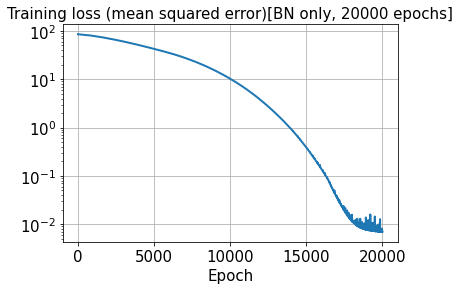

In [25]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[BN only, 20000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

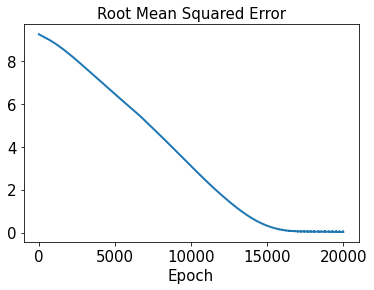

In [17]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [19]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [20]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [21]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [22]:
error_train_abs

array([[[0.01143463],
        [0.02244785],
        [0.02023659],
        [0.03806143],
        [0.0375843 ],
        [0.06183882],
        [0.07025709],
        [0.08003197],
        [0.10066156],
        [0.10858059],
        [0.14037437],
        [0.14054337],
        [0.11504517],
        [0.12387543],
        [0.11646175],
        [0.13035793]],

       [[0.01125963],
        [0.02267292],
        [0.0193331 ],
        [0.03888266],
        [0.03729033],
        [0.06622465],
        [0.07531061],
        [0.08716378],
        [0.11305695],
        [0.12622499],
        [0.19723411],
        [0.18486013],
        [0.10630093],
        [0.11337976],
        [0.06501579],
        [0.08405991]],

       [[0.01139967],
        [0.02249274],
        [0.02005544],
        [0.03822465],
        [0.03752542],
        [0.06271439],
        [0.07126675],
        [0.08145561],
        [0.10313673],
        [0.11210632],
        [0.15174179],
        [0.14940224],
        [0.11329117],
      

In [23]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.010378786363250615


In [24]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.00969372151448728
